In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
import warnings
warnings.filterwarnings("ignore")
import os


In [3]:
# Step 1: Load the Iris dataset

file_path = "/content/drive/MyDrive/Data Science Projects/App/app/static/set_songs.csv"
data = pd.read_csv(file_path)
output_path = "/content/drive/MyDrive/Data Science Projects/App/app/static"
os.makedirs(output_path, exist_ok=True)

In [4]:
# Step 2: Explore the data

print("Data Head:\n", data.head())
print("\nData Info:\n", data.info())
print("\nData Description:\n", data.describe())

Data Head:
    Year      TA01      TA02      TA03      TA04      TA05      TA06      TA07  \
0  2001  49.94357  21.47114  73.07750   8.74861 -17.40628 -13.09905 -25.01202   
1  2001  48.73215  18.42930  70.32679  12.94636 -10.32437 -24.83777   8.76630   
2  2001  50.95714  31.85602  55.81851  13.41693  -6.57898 -18.54940  -3.27872   
3  2001  48.24750  -1.89837  36.29772   2.58776   0.97170 -26.21683   5.05097   
4  2001  50.97020  42.20998  67.09964   8.46791 -15.85279 -16.81409 -12.48207   

       TA08      TA09  ...      TC69       TC70      TC71      TC72      TC73  \
0 -12.23257   7.83089  ...  13.01620  -54.40548  58.99367  15.37344   1.11144   
1  -0.92019  18.76548  ...   5.66812  -19.68073  33.04964  42.87836  -9.90378   
2  -2.35035  16.07017  ...   3.03800   26.05866 -50.92779  10.93792  -0.07568   
3 -10.34124   3.55005  ...  34.57337 -171.70734 -16.96705 -46.67617 -12.51516   
4  -9.37636  12.63699  ...   9.92661  -55.95724  64.92712 -17.72522  -1.49237   

       TC74   

In [5]:
# Step 3: Column details

print("\nColumn Details:")
for col in data.columns:
    print(f"Column: {col}, Type: {data[col].dtype}, Unique values: {data[col].nunique()}")


Column Details:
Column: Year, Type: int64, Unique values: 89
Column: TA01, Type: float64, Unique values: 413912
Column: TA02, Type: float64, Unique values: 457069
Column: TA03, Type: float64, Unique values: 454179
Column: TA04, Type: float64, Unique values: 441639
Column: TA05, Type: float64, Unique values: 449727
Column: TA06, Type: float64, Unique values: 438695
Column: TA07, Type: float64, Unique values: 441619
Column: TA08, Type: float64, Unique values: 424319
Column: TA09, Type: float64, Unique values: 433240
Column: TA10, Type: float64, Unique values: 419823
Column: TA11, Type: float64, Unique values: 396352
Column: TA12, Type: float64, Unique values: 426564
Column: TC01, Type: float64, Unique values: 446428
Column: TC02, Type: float64, Unique values: 463233
Column: TC03, Type: float64, Unique values: 463189
Column: TC04, Type: float64, Unique values: 463120
Column: TC05, Type: float64, Unique values: 462661
Column: TC06, Type: float64, Unique values: 462796
Column: TC07, Type: 

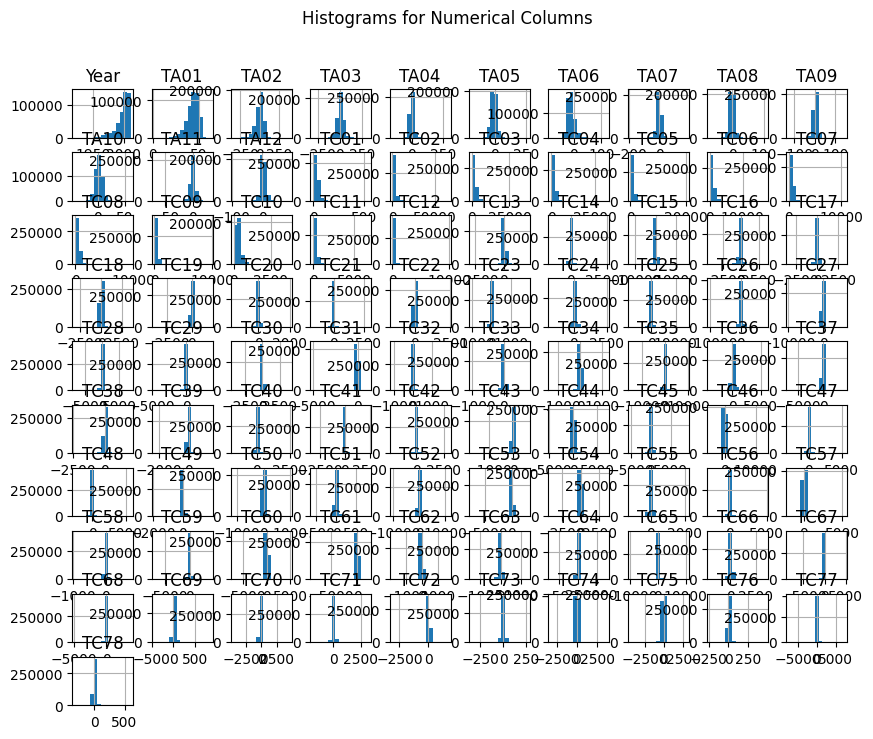

In [5]:
# Step 4: Visualize histograms for each numerical column

data.hist(bins=15, figsize=(10, 8))
plt.suptitle("Histograms for Numerical Columns")
# plt.show()
plt.savefig(os.path.join(output_path, "song_histograms.png"))


In [6]:
# Step 5: Handle missing values

# Display the number of missing values per column
print("Number of missing values in each column before filling:")
print(data.isnull().sum())

# Save the mean values for numerical columns with missing values
mean_values_with_na = data.mean(numeric_only=True)

# Save the mode values for categorical columns with missing values
mode_values_with_na = data.mode().iloc[0]


Number of missing values in each column before filling:
Year    0
TA01    0
TA02    0
TA03    0
TA04    0
       ..
TC74    0
TC75    0
TC76    0
TC77    0
TC78    0
Length: 91, dtype: int64


In [7]:
# Fill missing values with the mean of numerical columns and mode of categorical columns
for column in data.columns:
    if data[column].dtype == 'object':  # Categorical columns
        if data[column].isnull().any():
            data[column].fillna(mode_values_with_na[column], inplace=True)
    else:  # Numerical columns
        if data[column].isnull().any():
            data[column].fillna(mean_values_with_na[column], inplace=True)

In [8]:
# Display the mean/mode values used to fill each column with missing values
print("\nValues used to fill columns with missing values:")
for column in data.columns:
    if data[column].dtype == 'object':  # Categorical columns
        if column in mode_values_with_na:
            print(f"{column}: {mode_values_with_na[column]}")
    else:  # Numerical columns
        if column in mean_values_with_na:
            print(f"{column}: {mean_values_with_na[column]}")


Values used to fill columns with missing values:
Year: 1998.3860949074324
TA01: 43.385487830089616
TA02: 1.2610910179097086
TA03: 8.650195117367346
TA04: 1.1307632691416065
TA05: -6.512724527457595
TA06: -9.565527100783886
TA07: -2.384609496501084
TA08: -1.7937215332046619
TA09: 3.7145844560128514
TA10: 1.872494542294297
TA11: -0.14312498422522452
TA12: 2.541423114024779
TC01: 33.66888340849445
TC02: 2435.896464211055
TC03: 1965.101815695999
TC04: 1512.050632820698
TC05: 910.4328026383447
TC06: 877.5988920361859
TC07: 603.1971067386862
TC08: 516.1716237378993
TC09: 393.8073868177651
TC10: 325.03471074509133
TC11: 288.23735352218495
TC12: 292.14091993795756
TC13: 43.084683384686706
TC14: 43.24729244645957
TC15: -46.345459458029175
TC16: -27.963912916575907
TC17: 14.61401867955533
TC18: 44.663770227402615
TC19: 5.338153788188866
TC20: 23.986167681571658
TC21: 9.844326200769872
TC22: -4.153167431180791
TC23: 0.6367370448227897
TC24: 72.72131576571819
TC25: -51.70482431006115
TC26: 117.33

In [9]:
# Step 6: Identify and remove outliers using IQR (Interquartile Range)

# Identifying outliers for each numeric column
outlier_columns = []
outliers_dict = {}

# Iterate over each numeric column in the dataset
for feature in data.select_dtypes(include=[np.number]).columns:
    # Calculate Q1 (25th percentile), Q3 (75th percentile), and IQR (Interquartile Range)
    Q1 = data[feature].quantile(0.25)  # 25th percentile
    Q3 = data[feature].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile Range (difference between Q3 and Q1)

    # Identify outliers using the IQR rule: values lower than Q1 - 1.5 * IQR or higher than Q3 + 1.5 * IQR
    outlier_mask = (data[feature] < (Q1 - 1.5 * IQR)) | (data[feature] > (Q3 + 1.5 * IQR))

    # If there are any outliers for this feature, store them in the outliers_dict
    if outlier_mask.any():  # If there is at least one outlier
        outliers_dict[feature] = data[outlier_mask]  # Store outliers in the dictionary
        outlier_columns.append(feature)  # Add the feature name to the outlier_columns list

Datele de ieșire de afișat au fost trunchiate la ultimele 5000 linii.
200     1935  28.23865 -210.09303  17.52676   2.19025  32.08925   0.44376   
208     1941  31.96273 -101.69543  41.96745  -4.76271   3.56367  36.30043   
220     1930  35.55615  -56.58205  62.04075  -7.53863 -84.55047  36.35813   
...      ...       ...        ...       ...       ...       ...       ...   
463678  1969  39.85364   72.21458 -51.69949  37.93324 -16.45732  15.18013   
463680  1969  41.33026  -21.06179 -18.13709  34.64392  30.92277  -4.74264   
463686  1969  32.35276  -21.61338 -15.56535  30.59128 -10.75754  11.50020   
463687  1969  30.85994  -23.31343   0.98213  41.34386  -5.00385  10.05536   
463691  1969  40.61572   22.47432 -14.12300   8.51606 -36.26797  23.11719   

            TA07      TA08      TA09  ...      TC69       TC70       TC71  \
194    -41.02192   4.62923 -16.18052  ...  59.13603  -40.20129  -49.39461   
199    -47.86844  16.39423 -40.76835  ...  70.58999 -199.31135  -43.84401   
200  

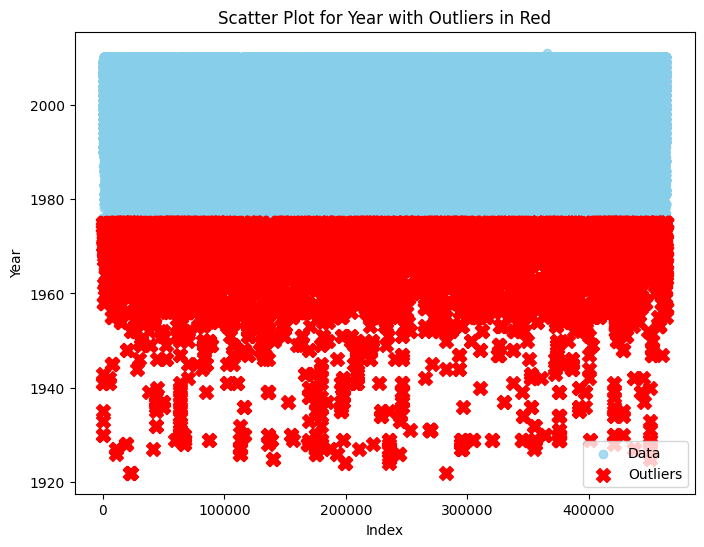

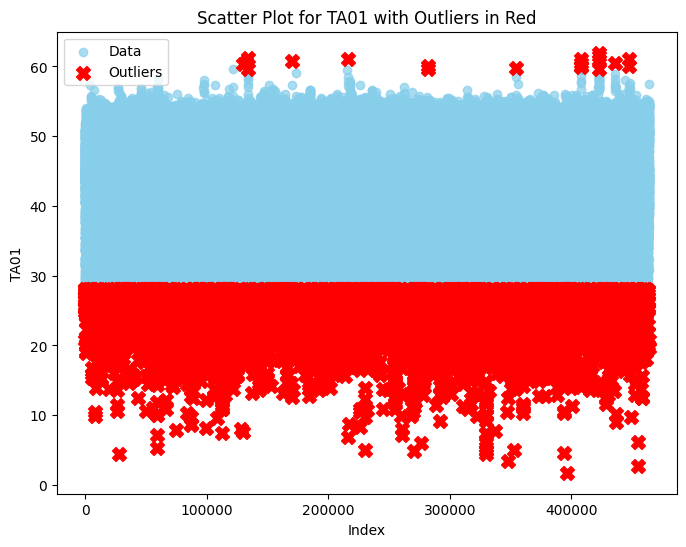

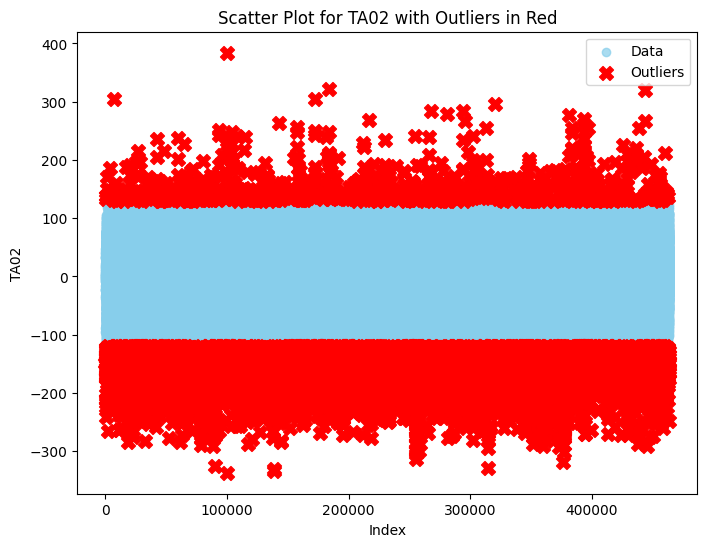

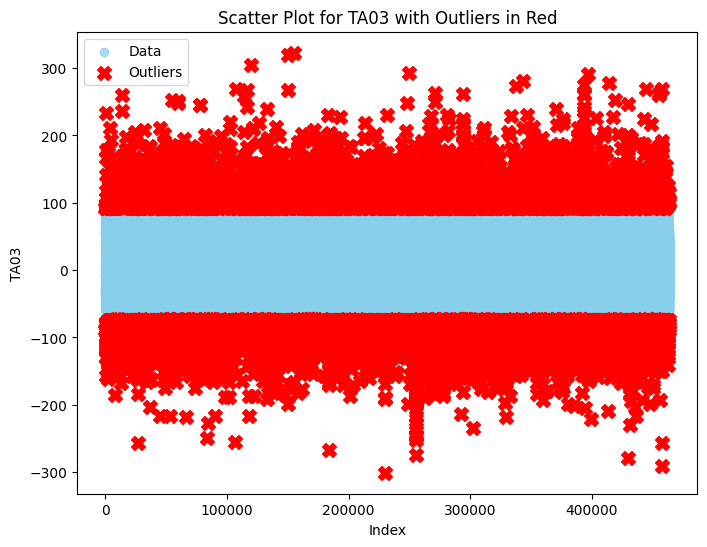

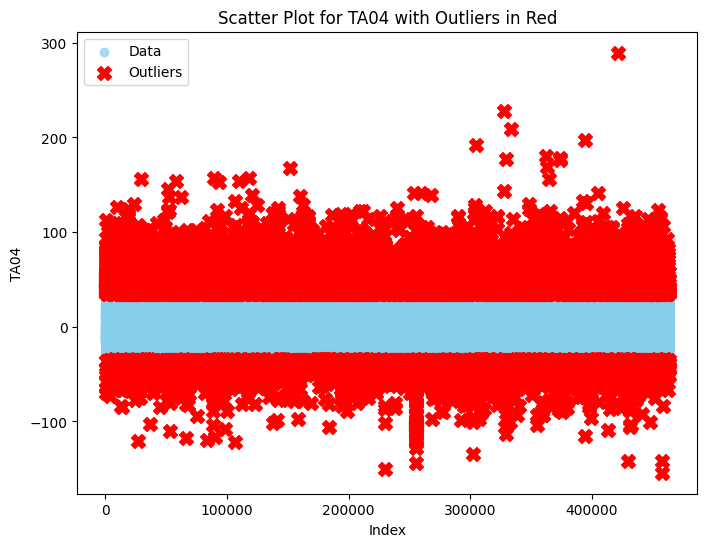

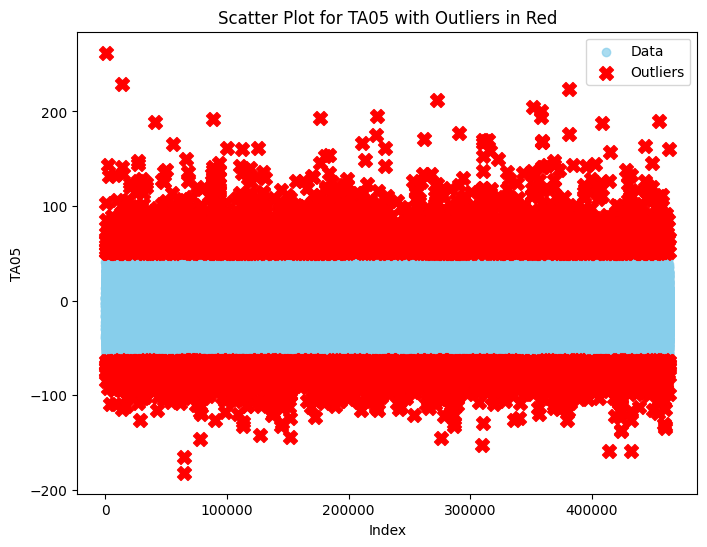

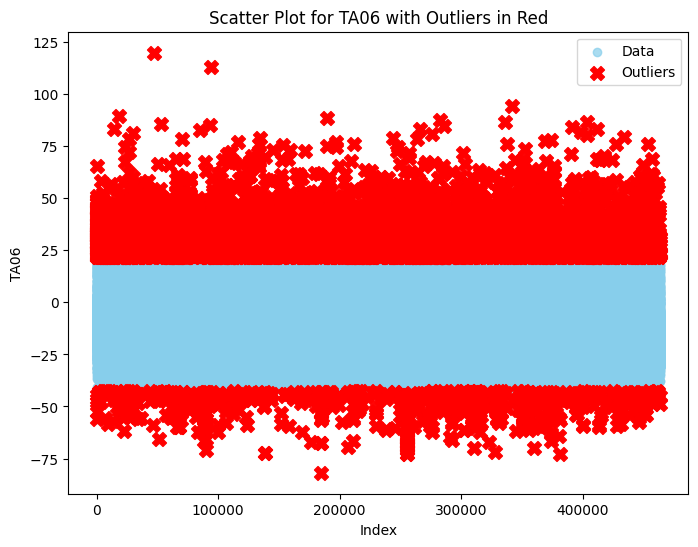

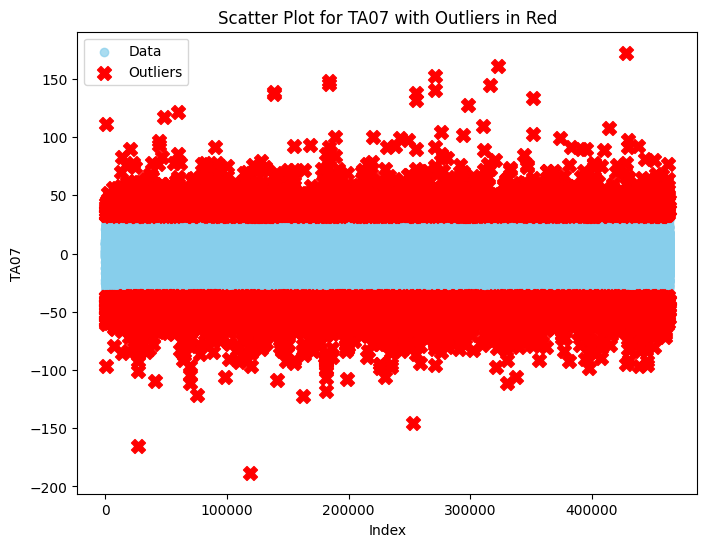

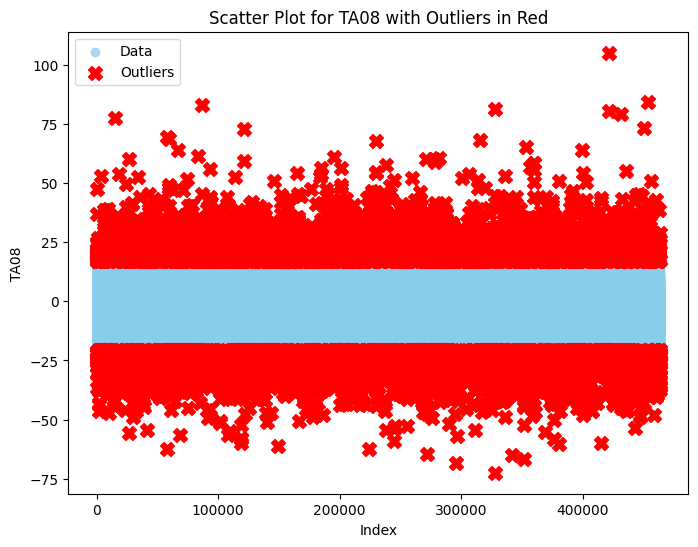

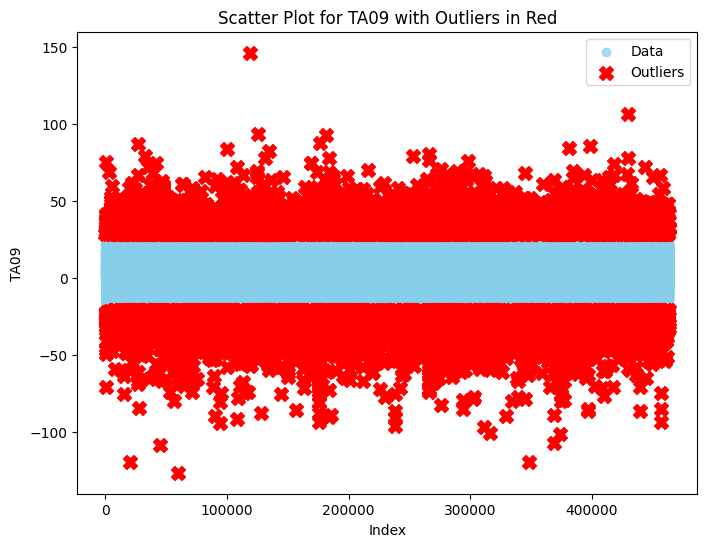

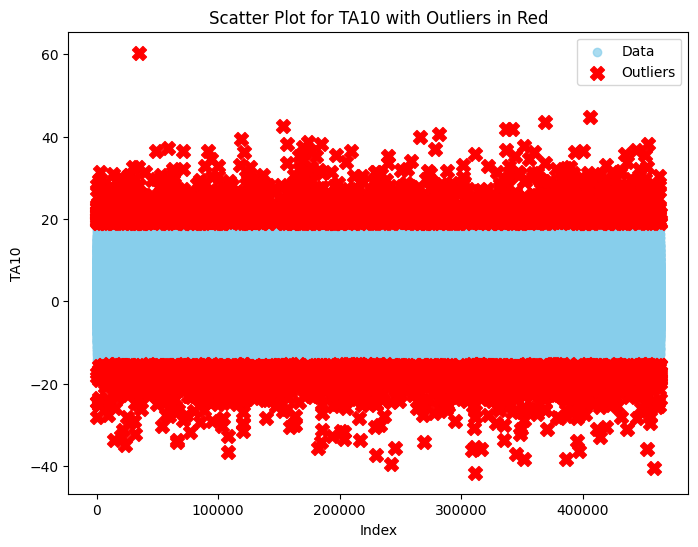

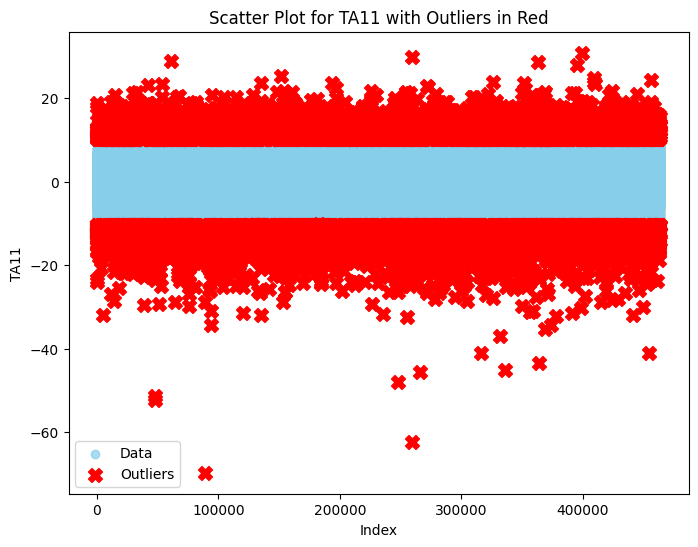

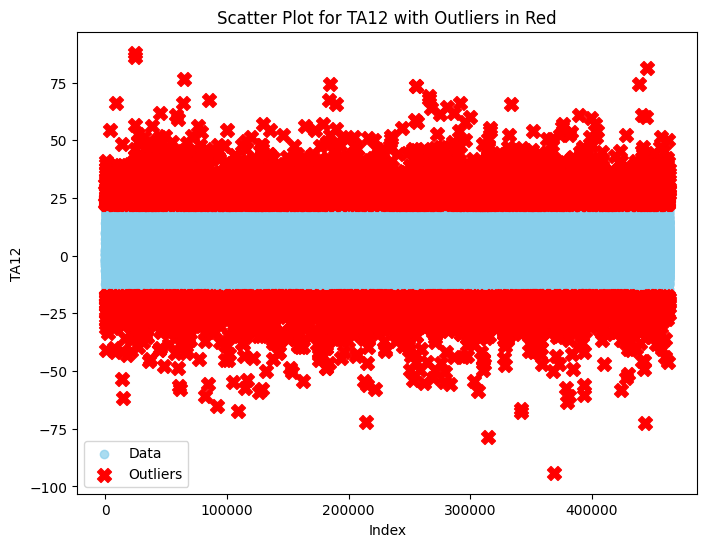

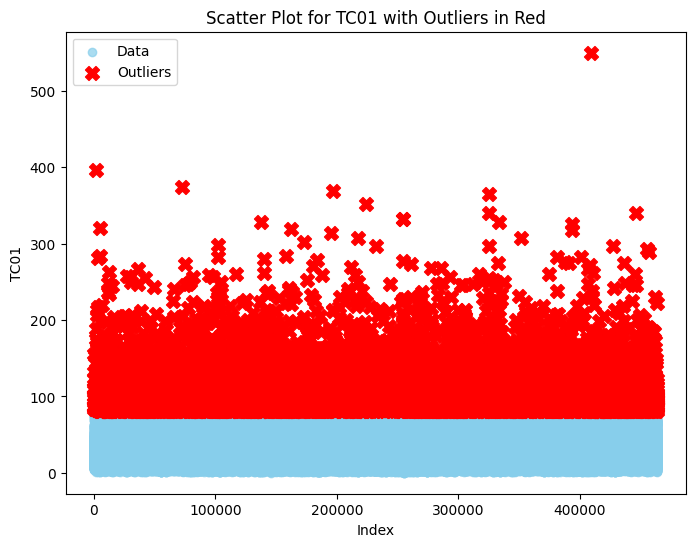

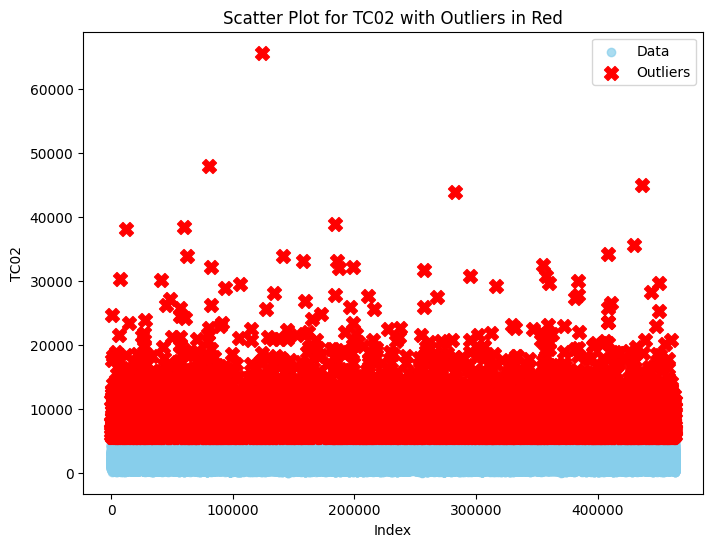

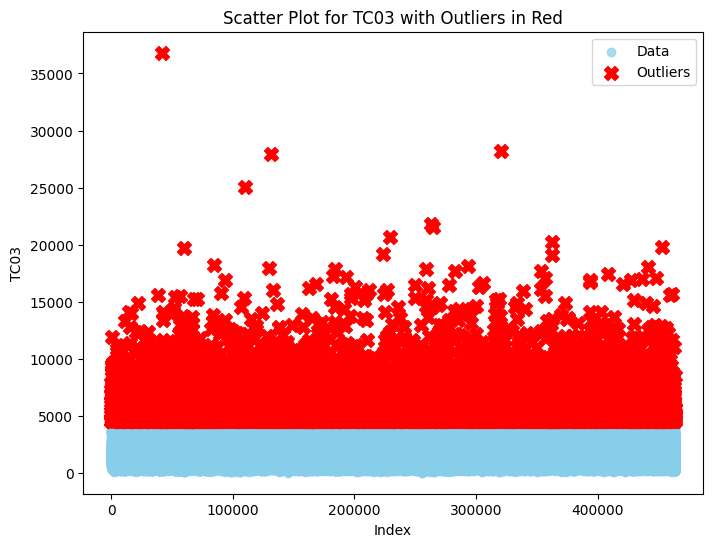

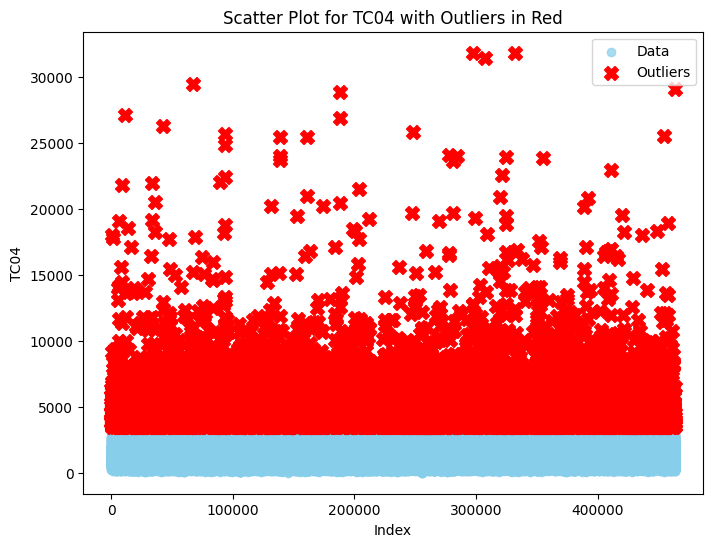

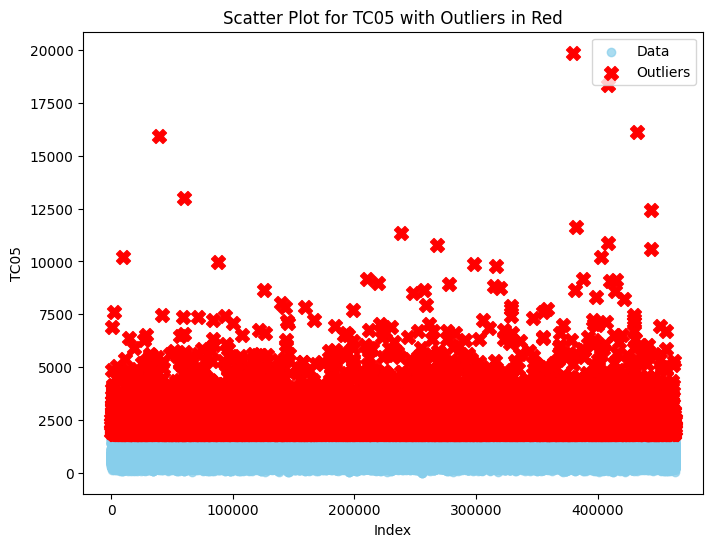

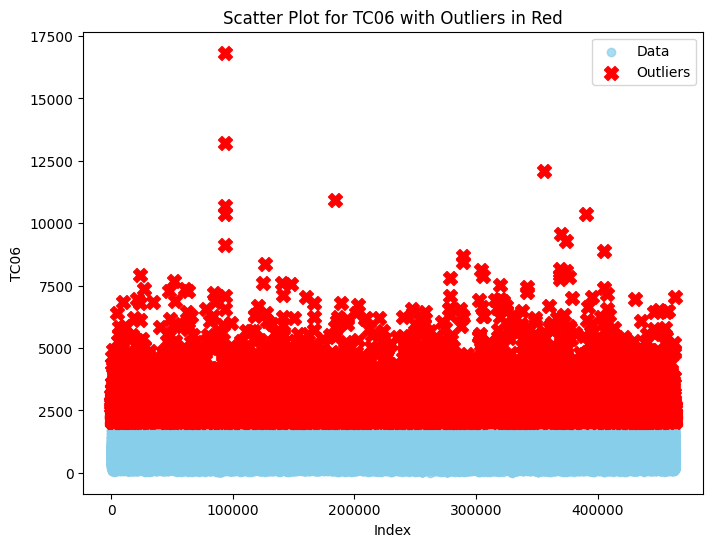

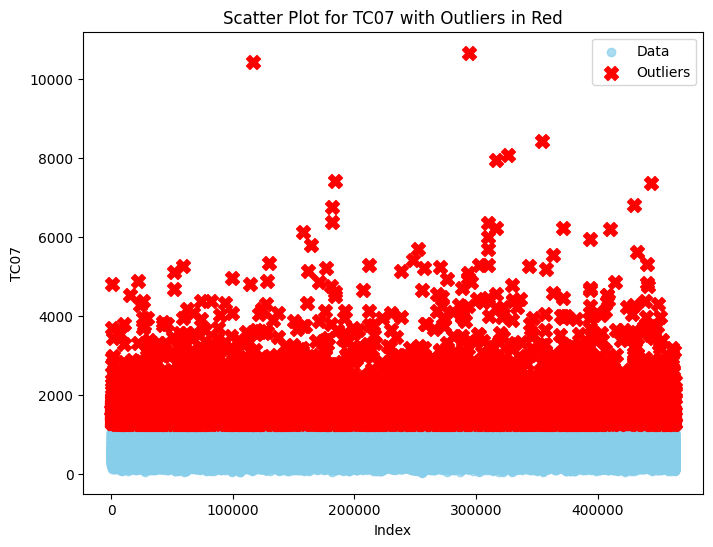

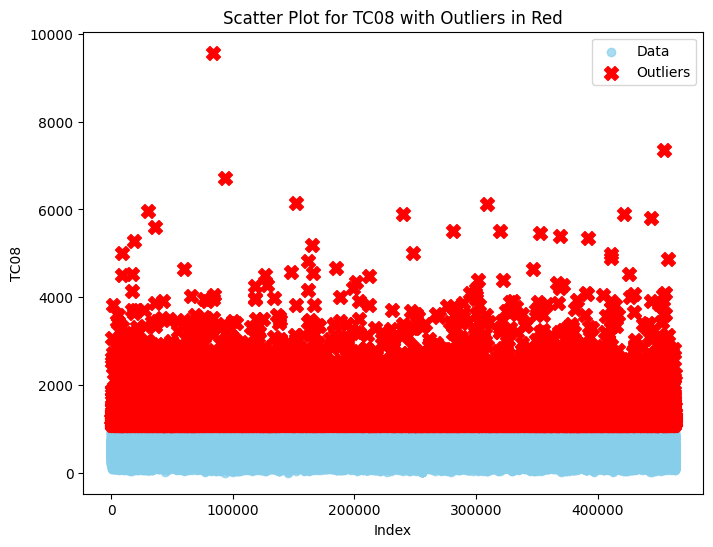

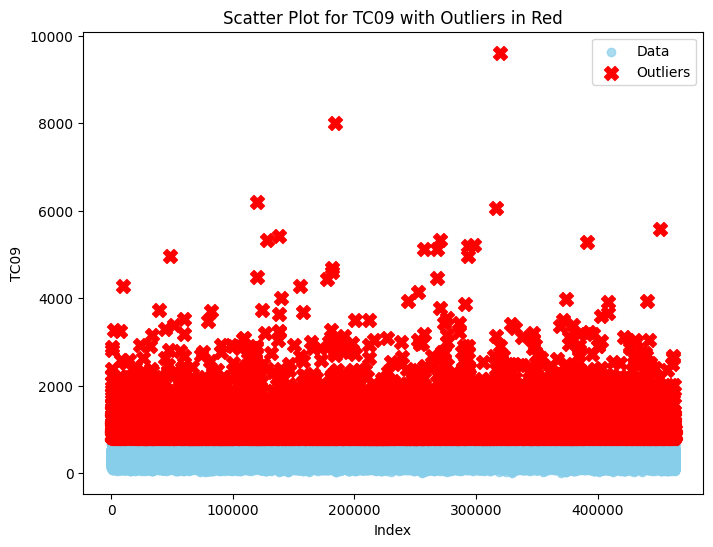

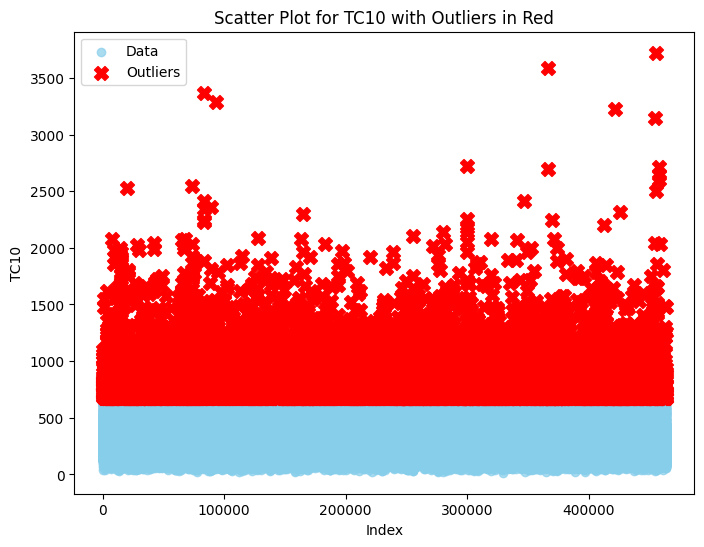

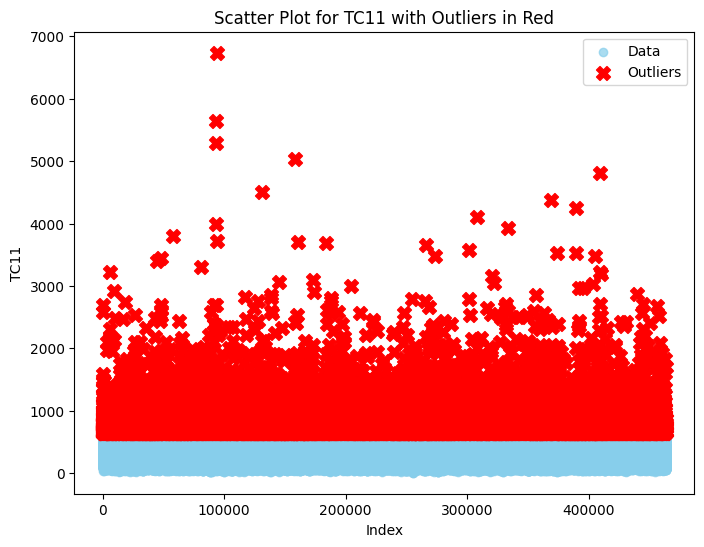

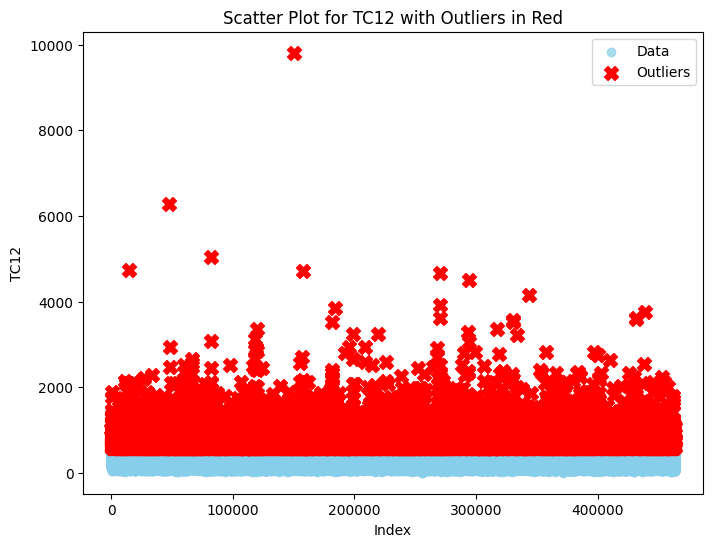

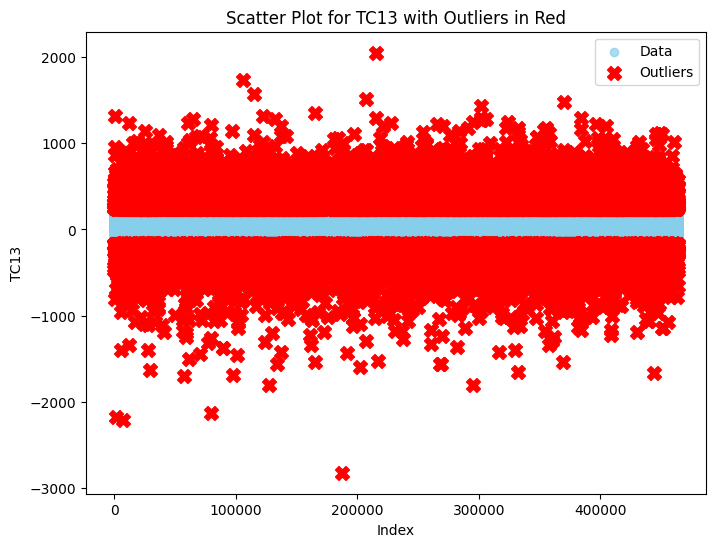

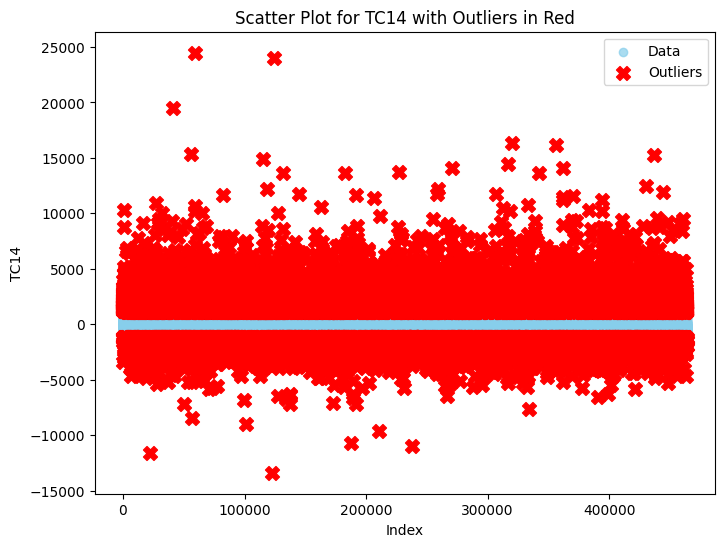

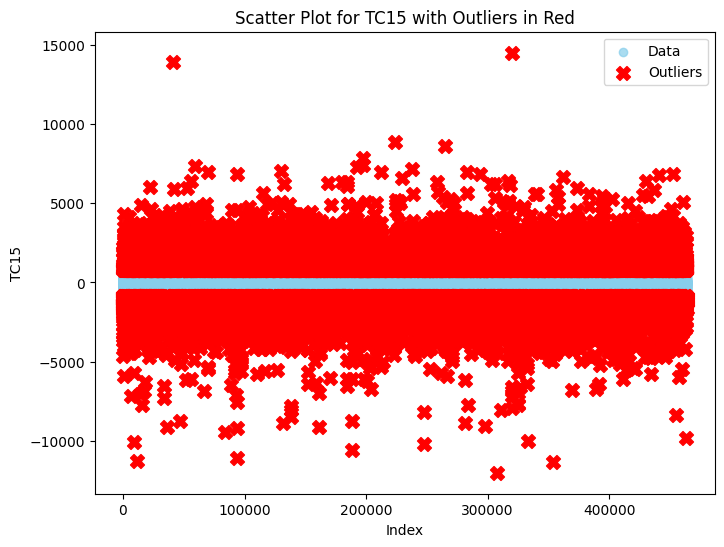

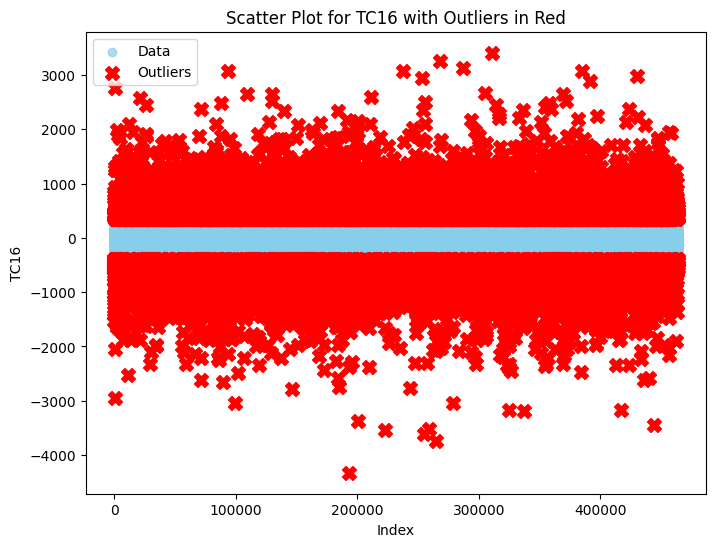

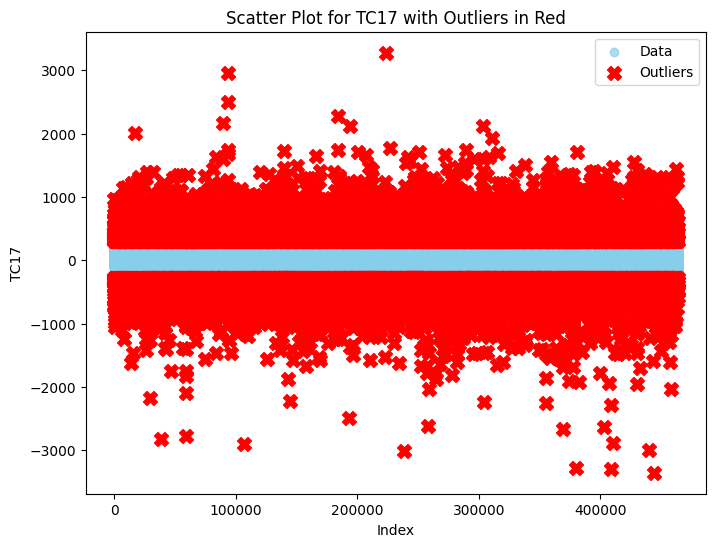

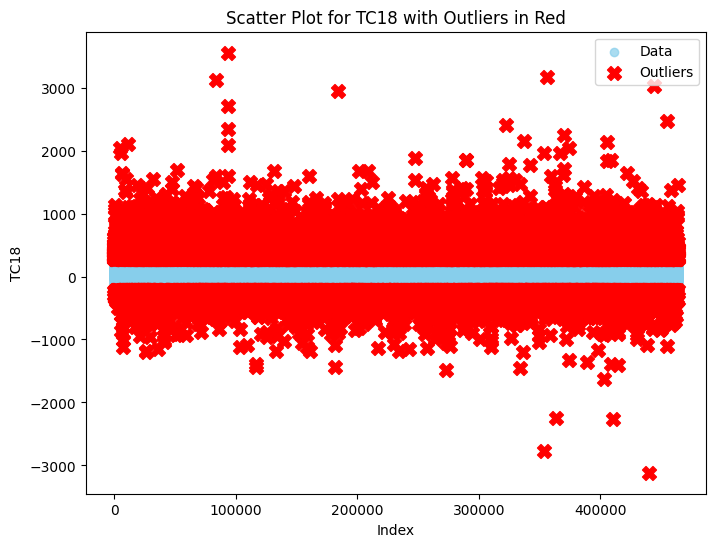

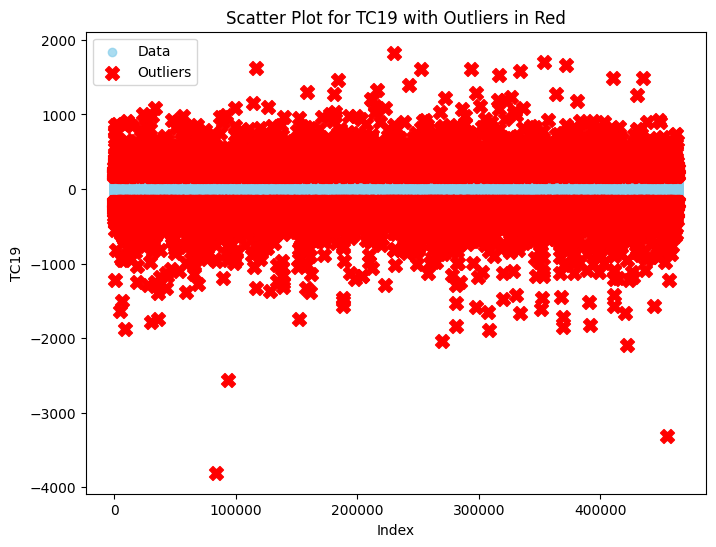

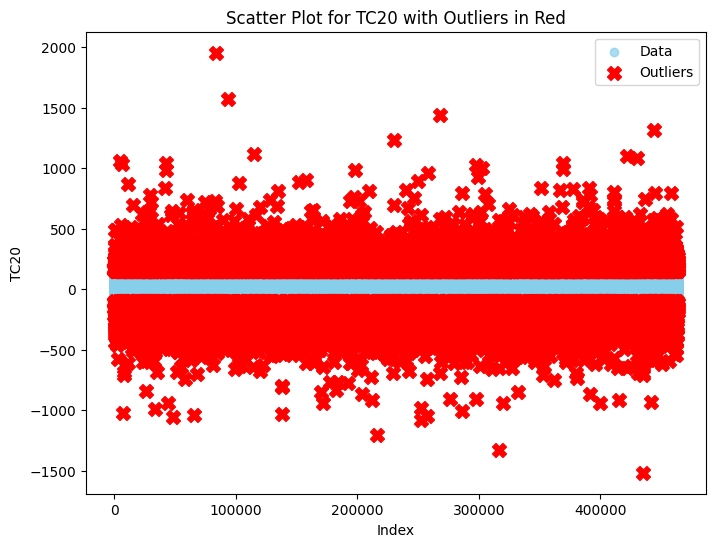

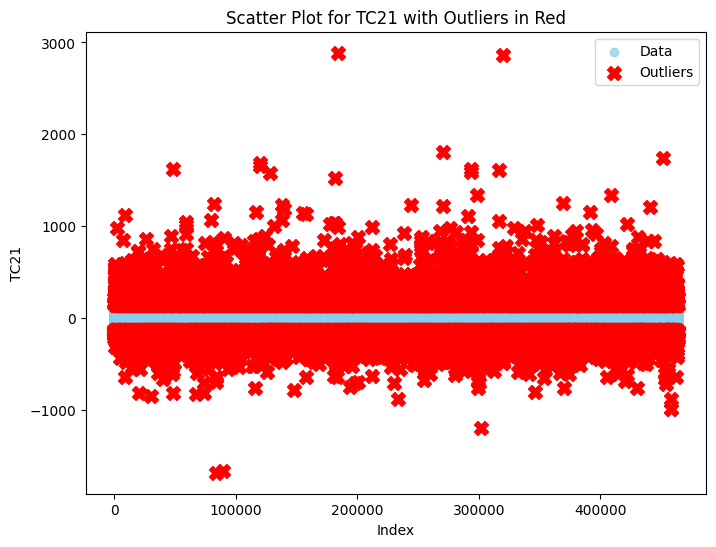

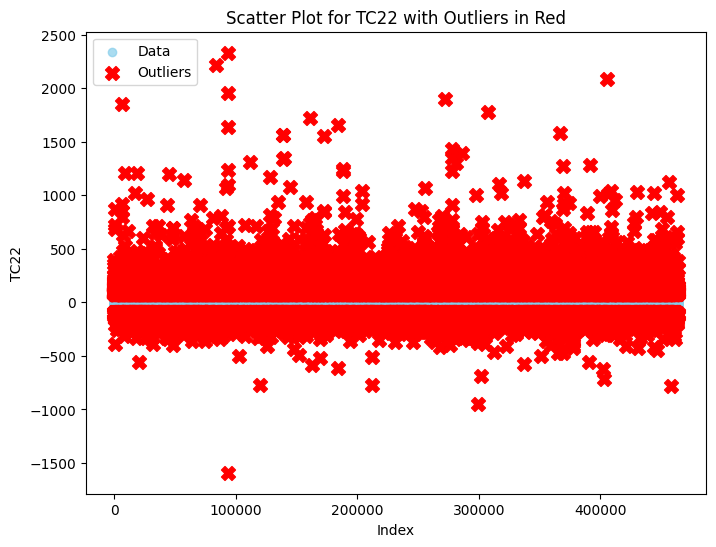

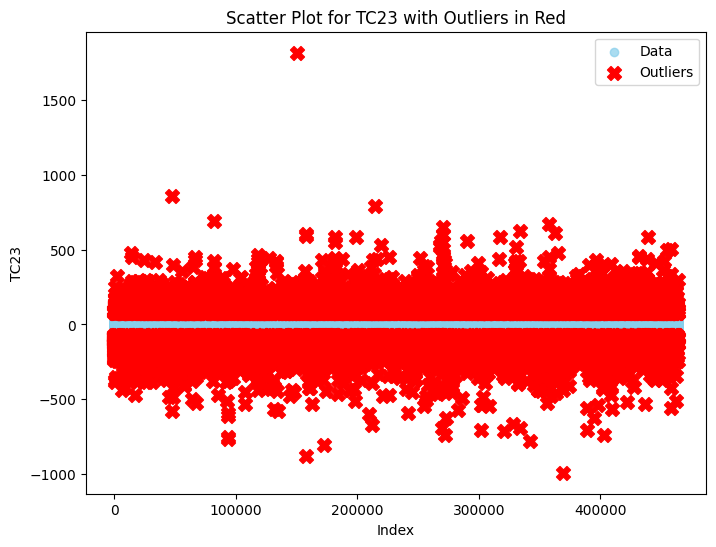

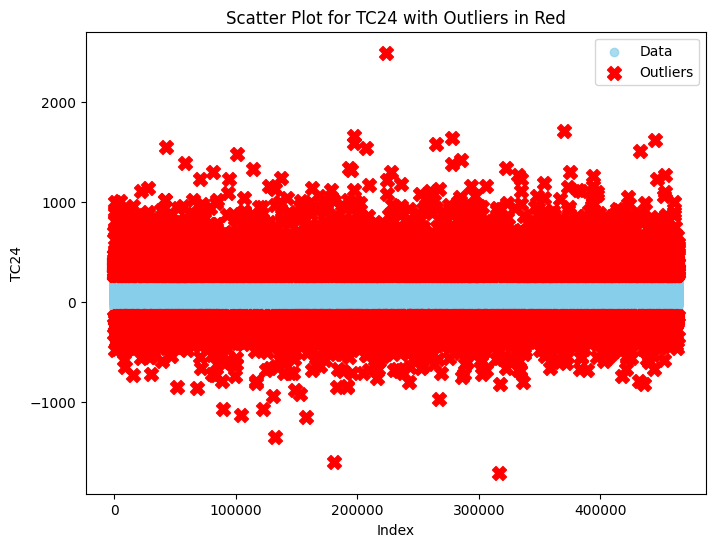

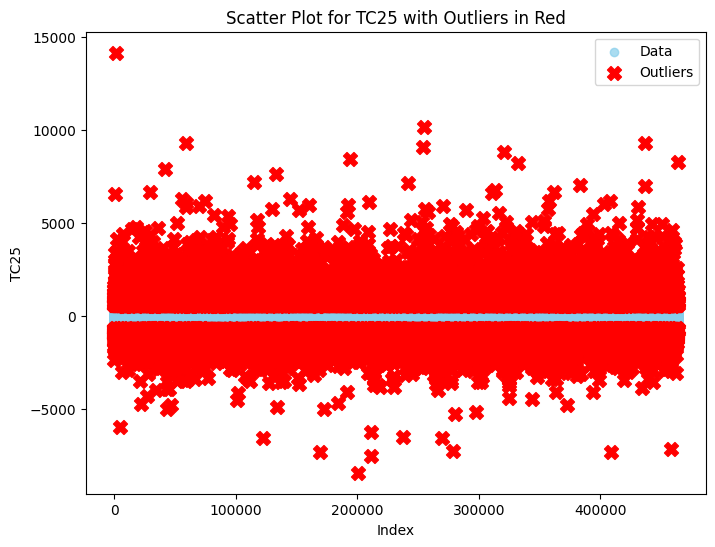

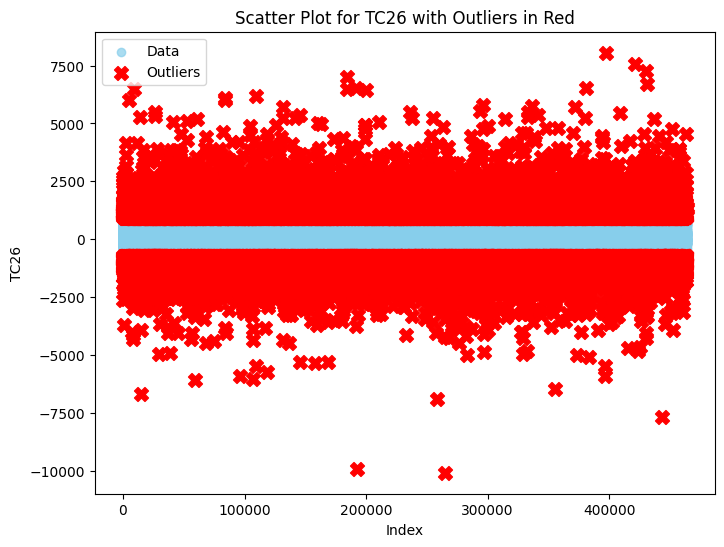

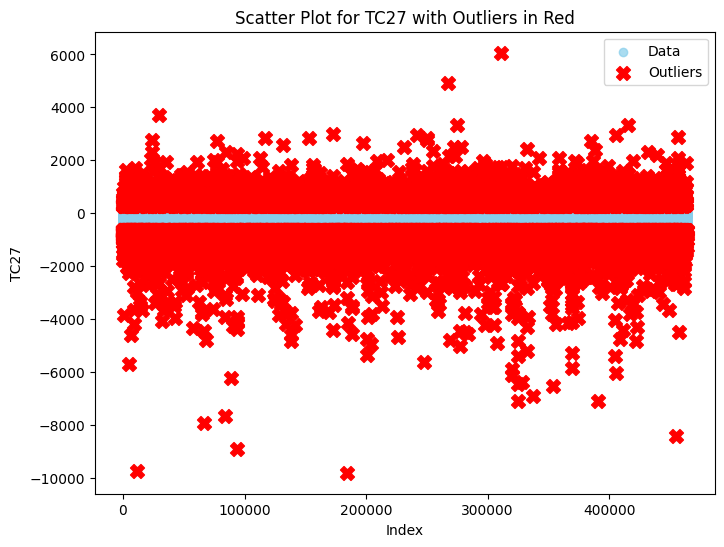

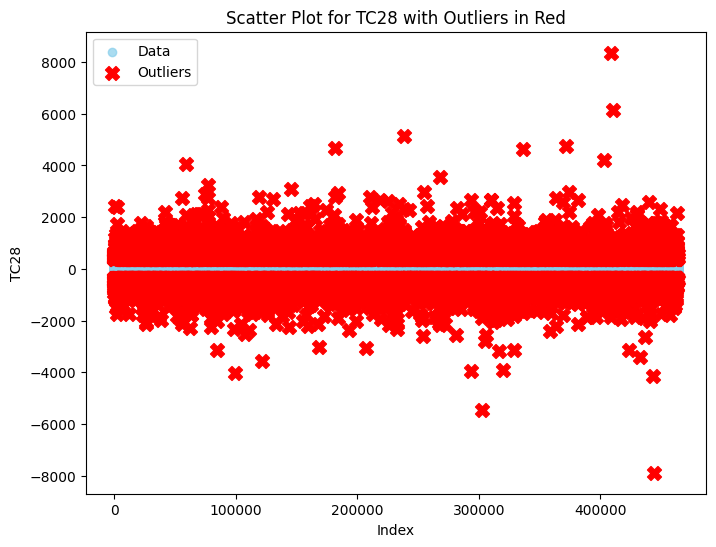

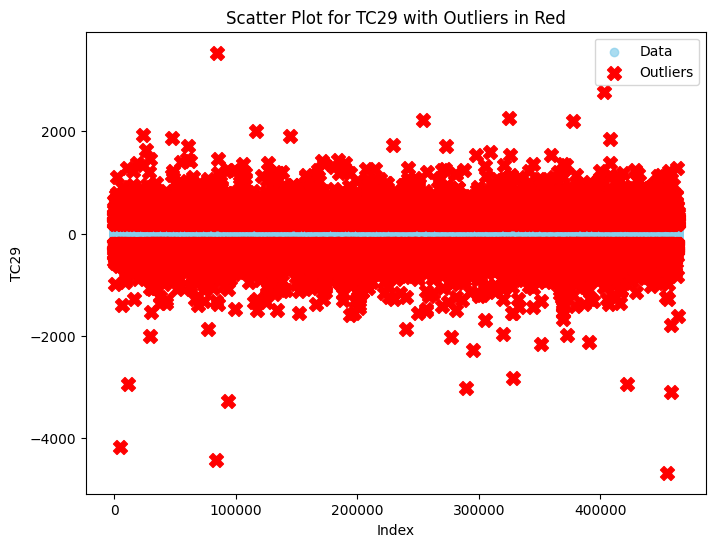

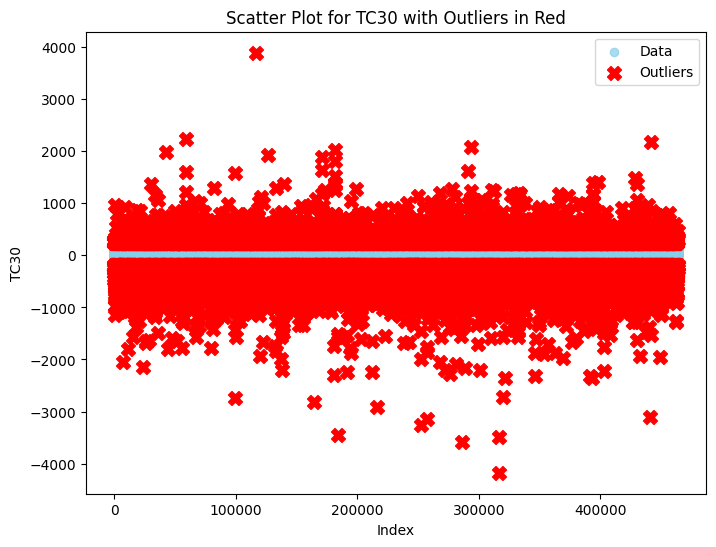

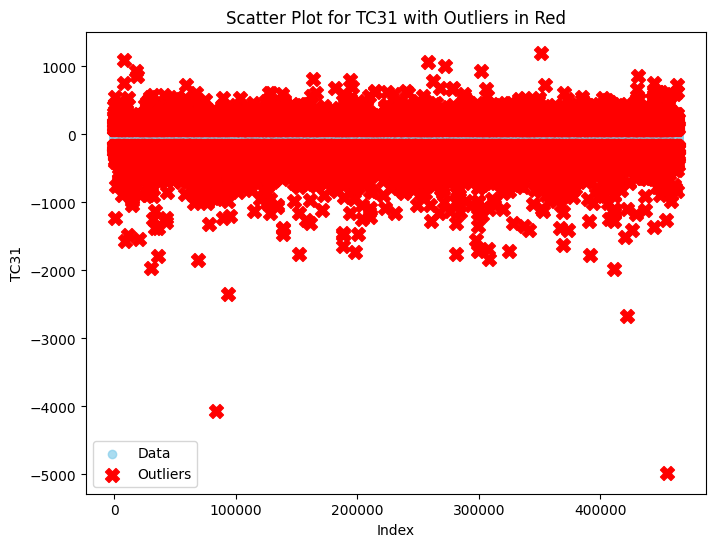

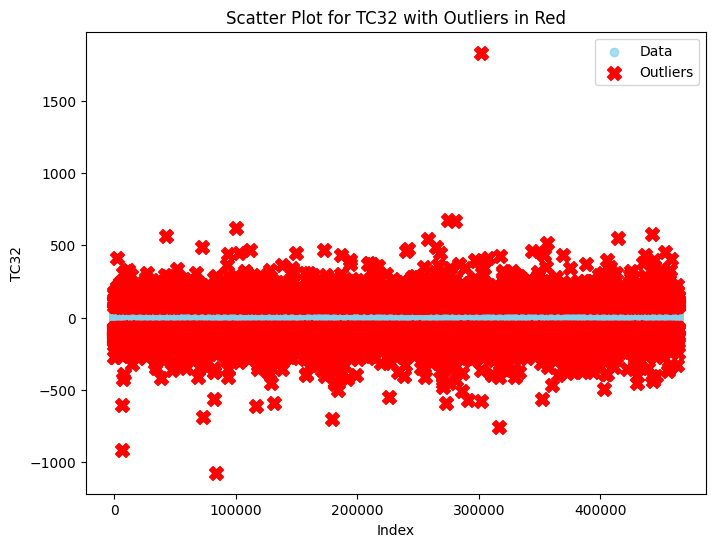

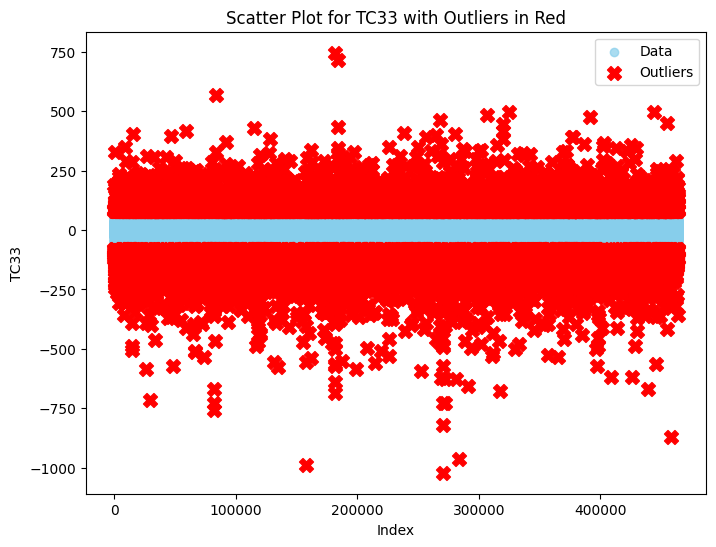

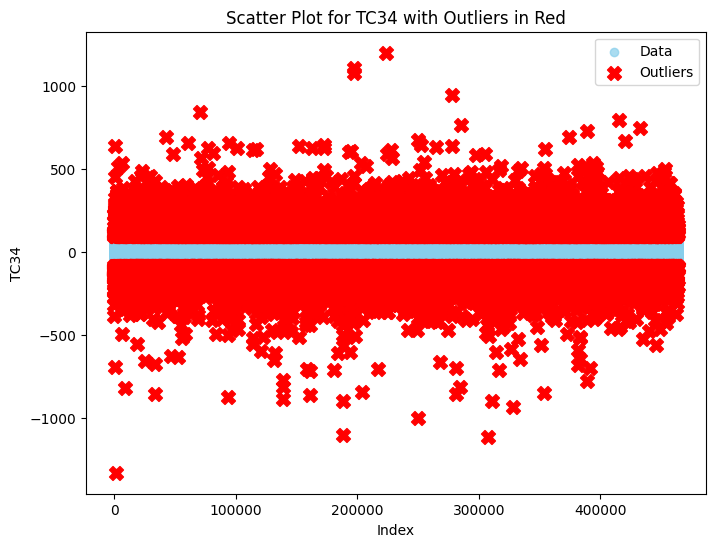

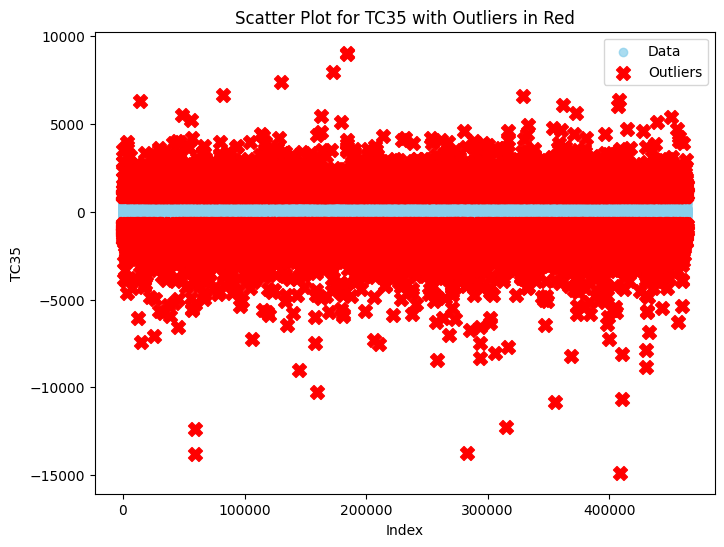

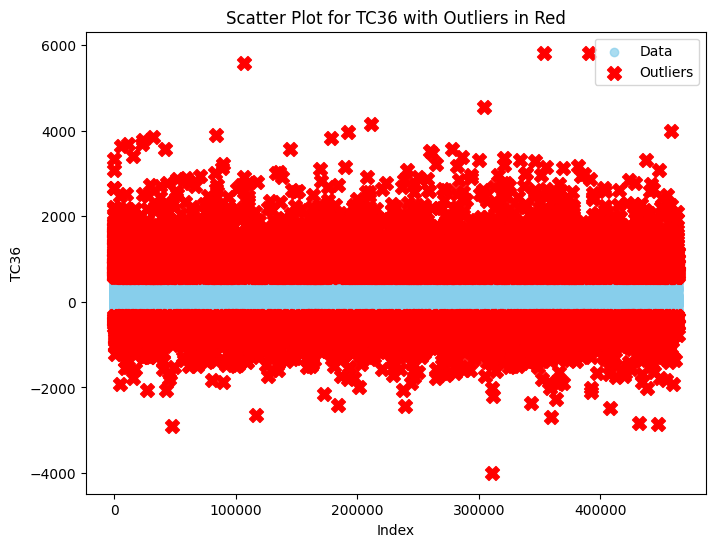

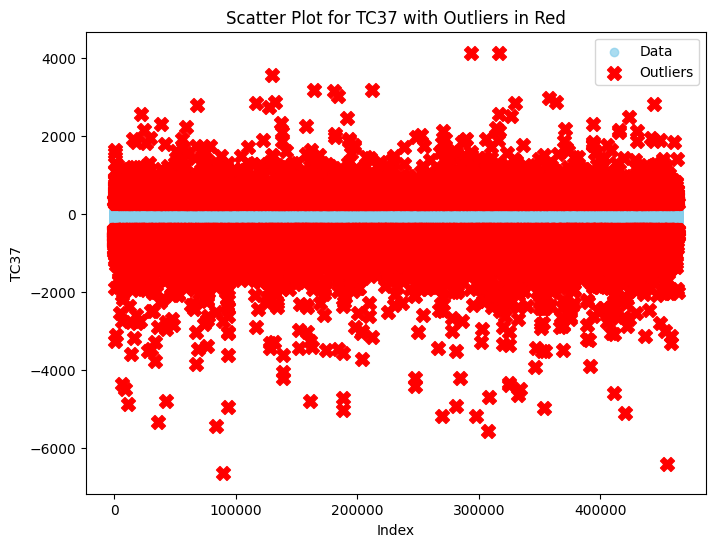

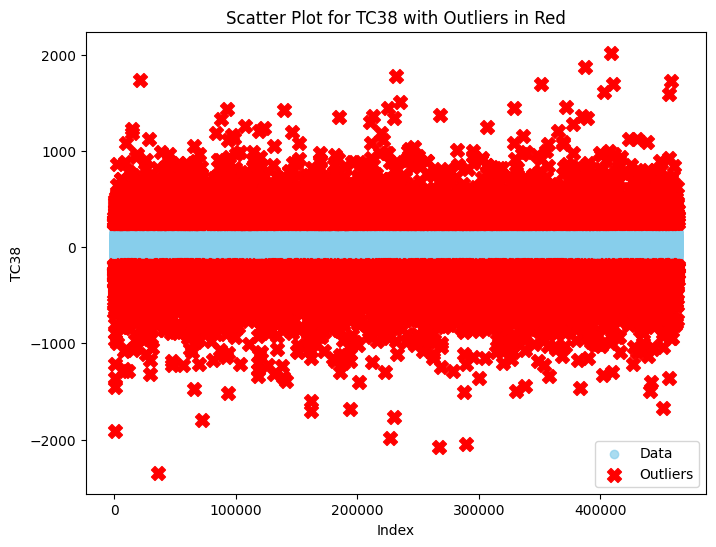

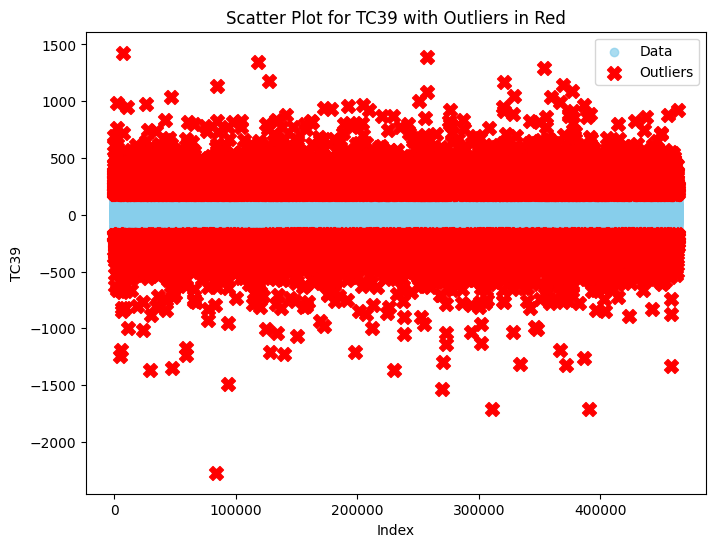

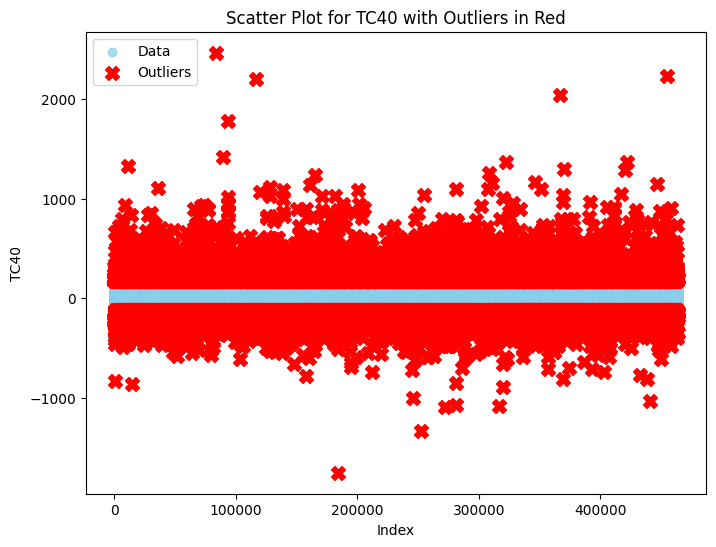

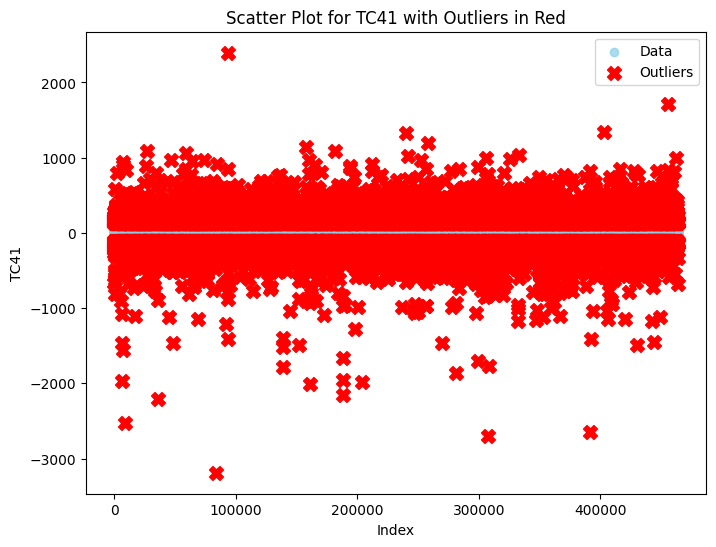

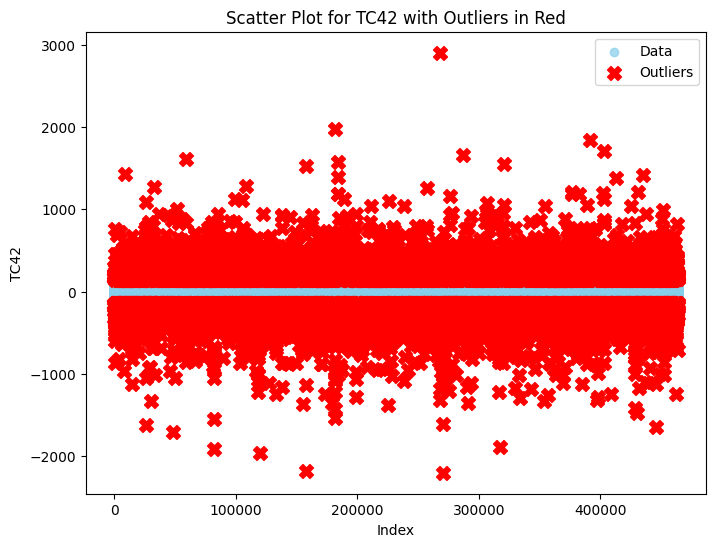

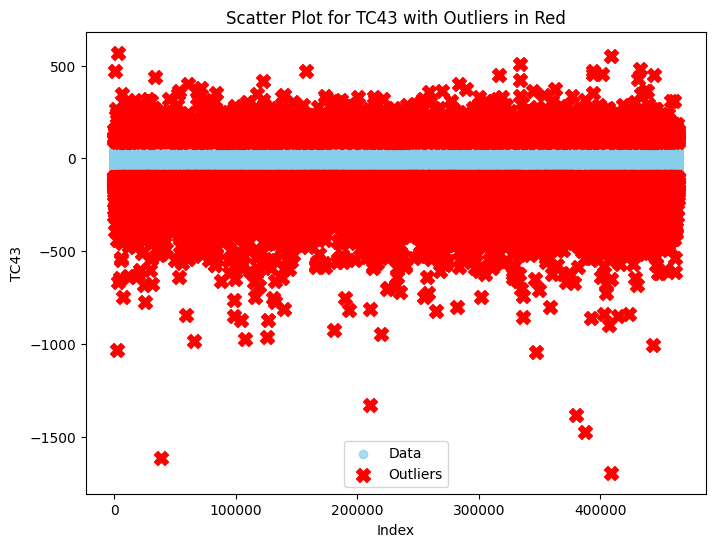

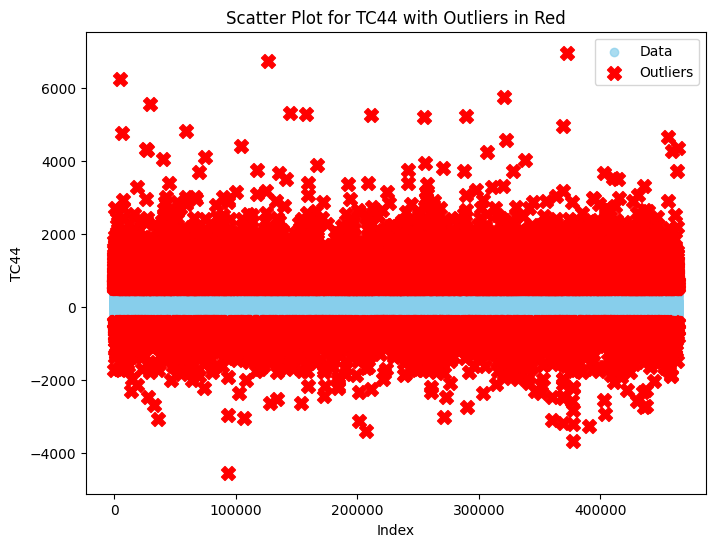

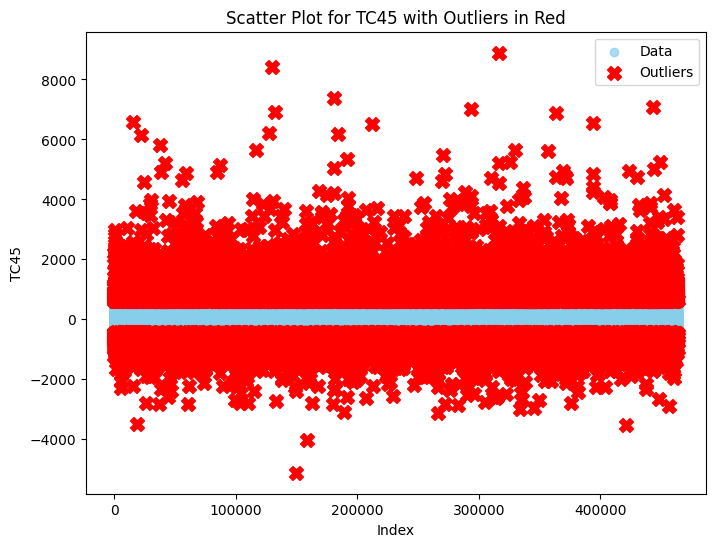

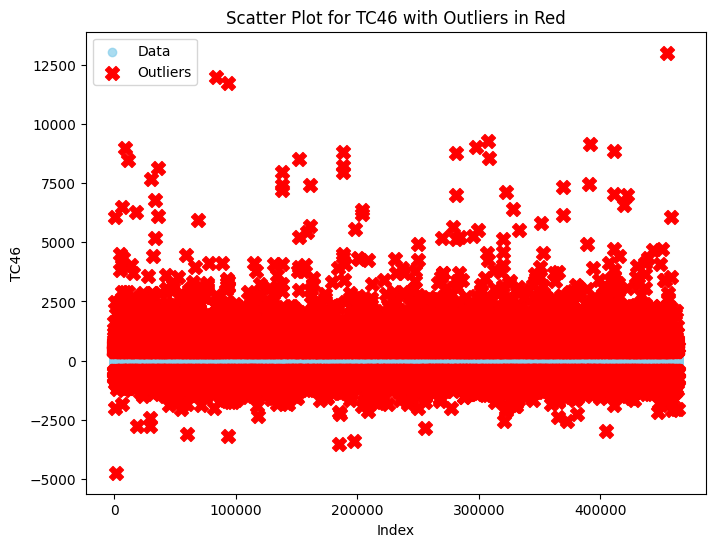

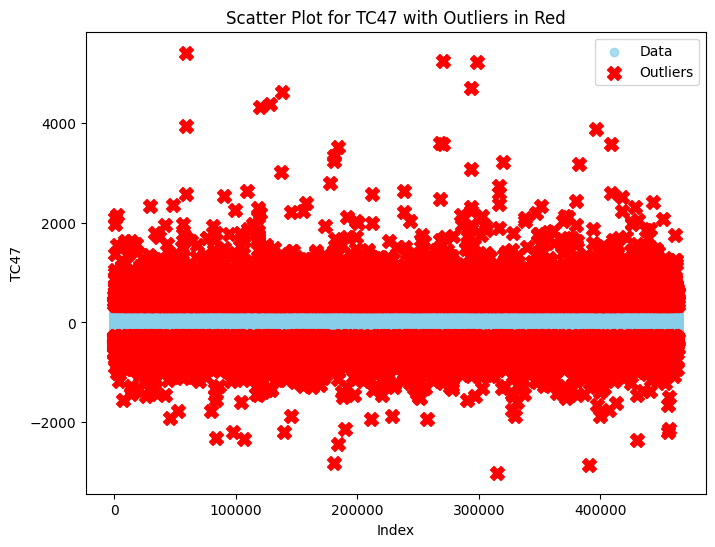

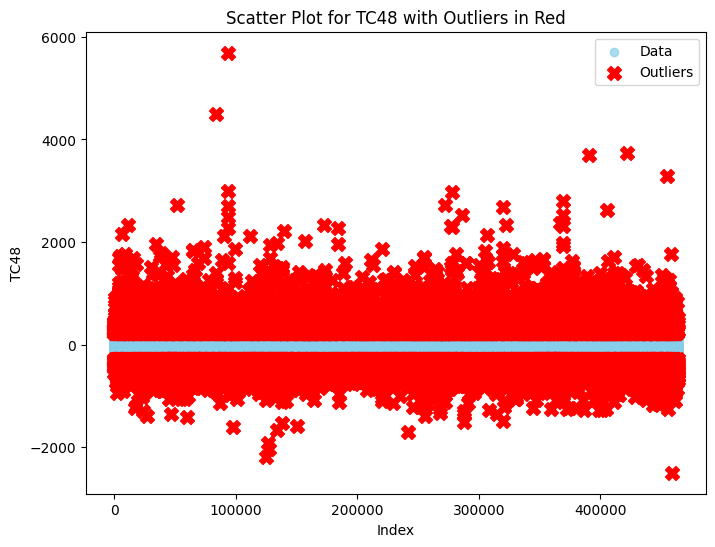

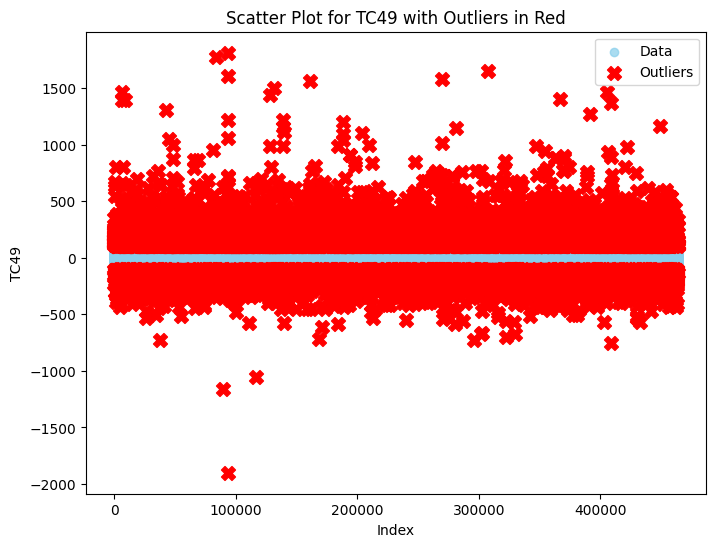

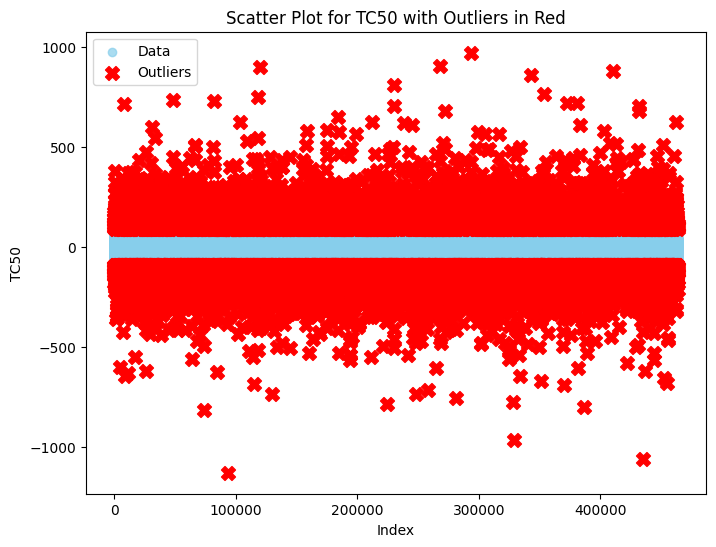

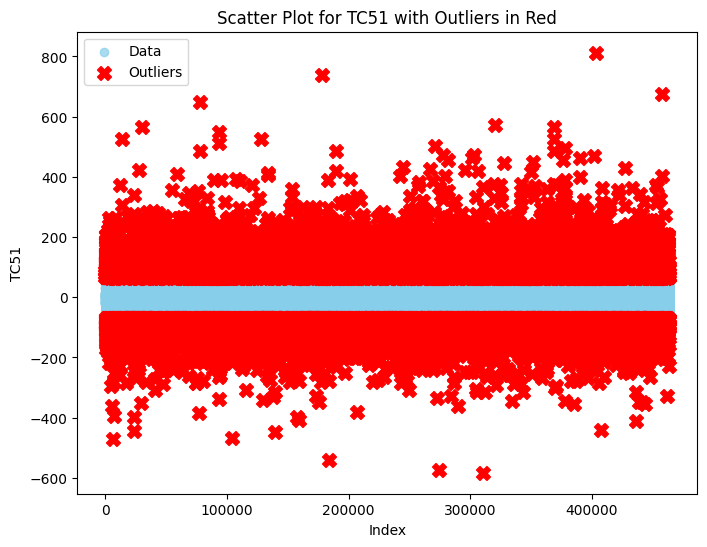

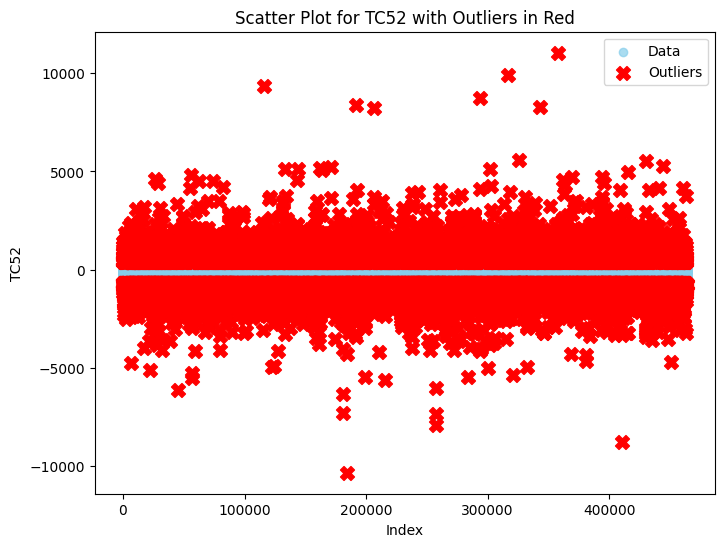

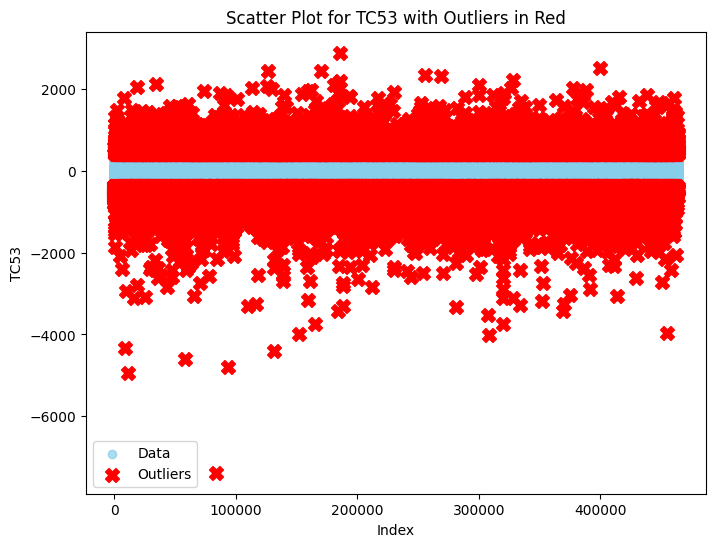

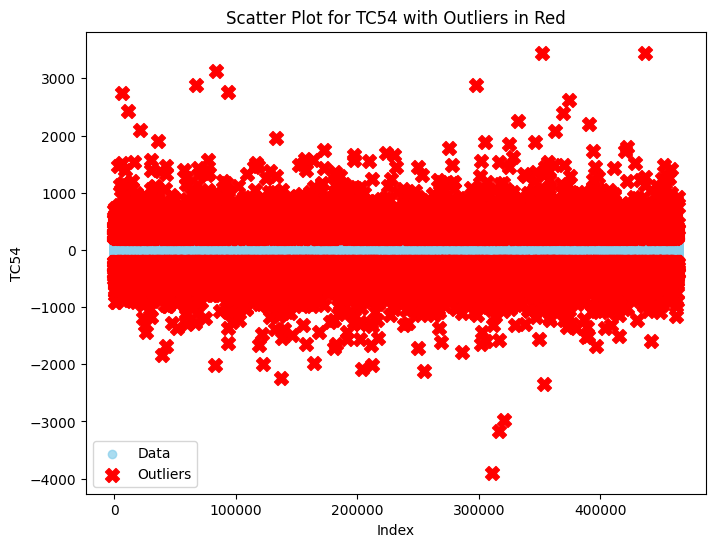

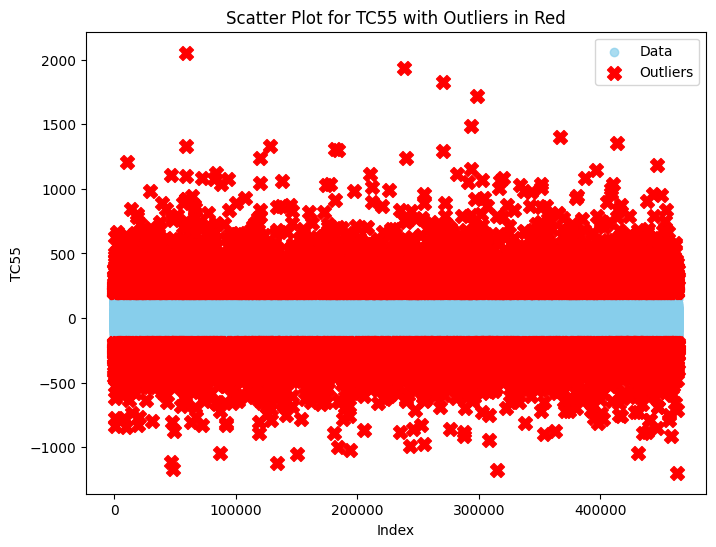

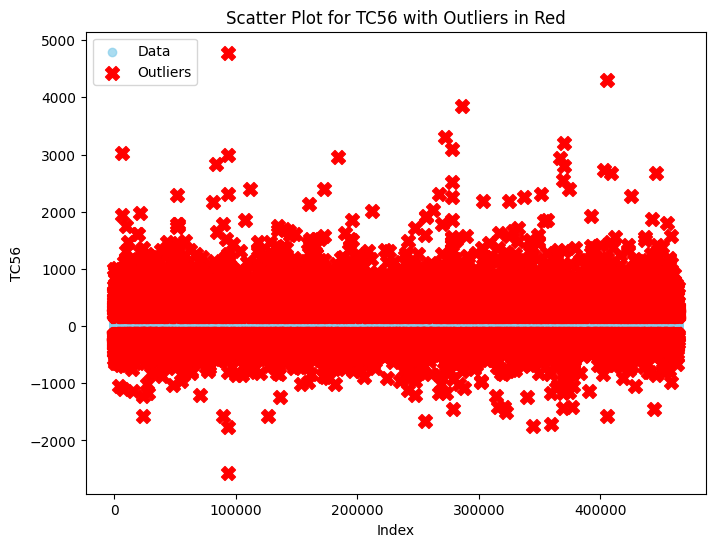

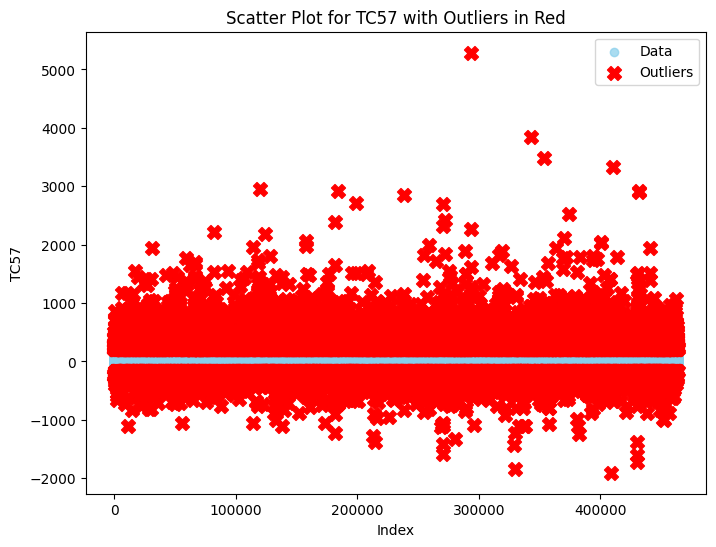

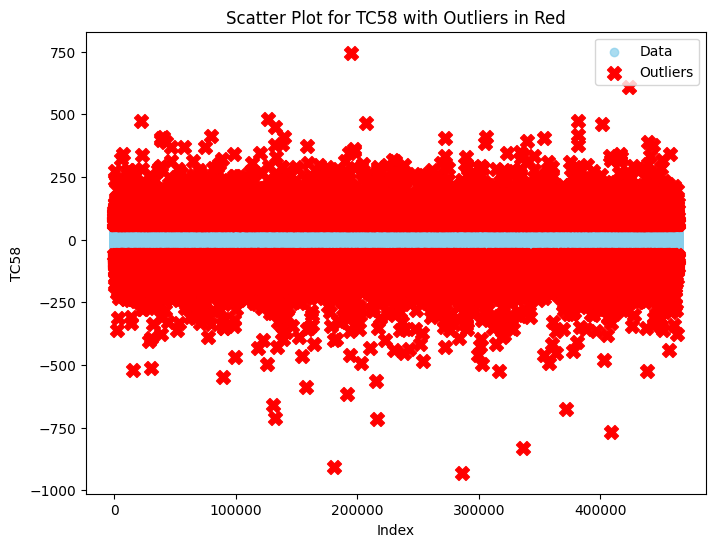

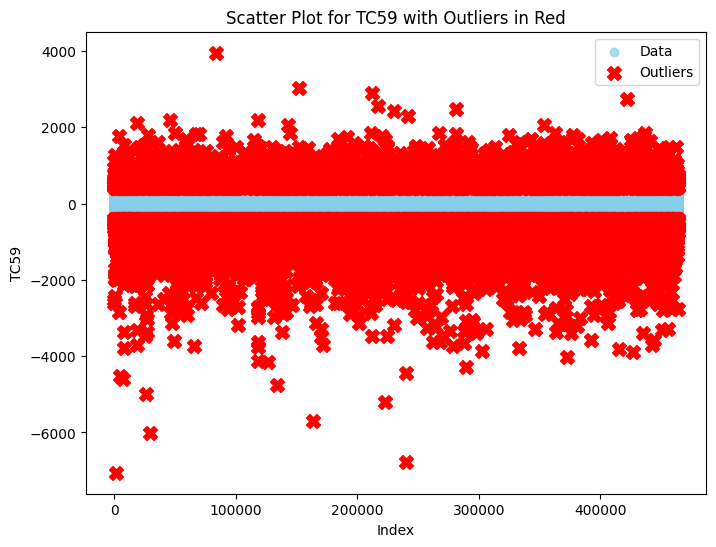

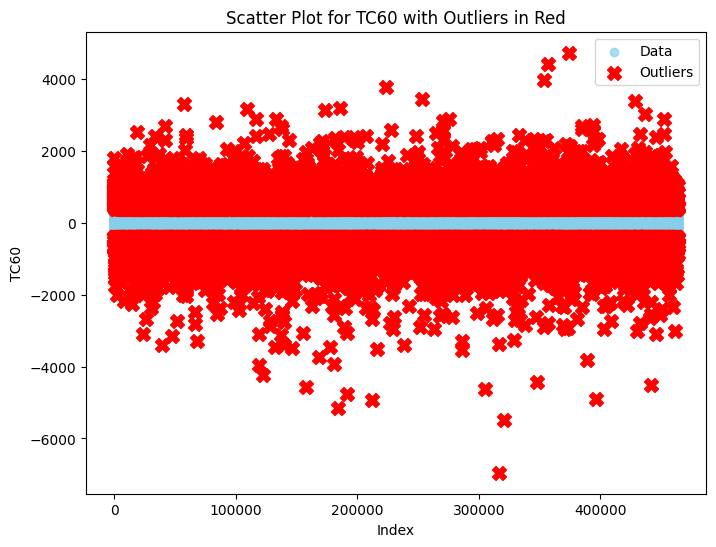

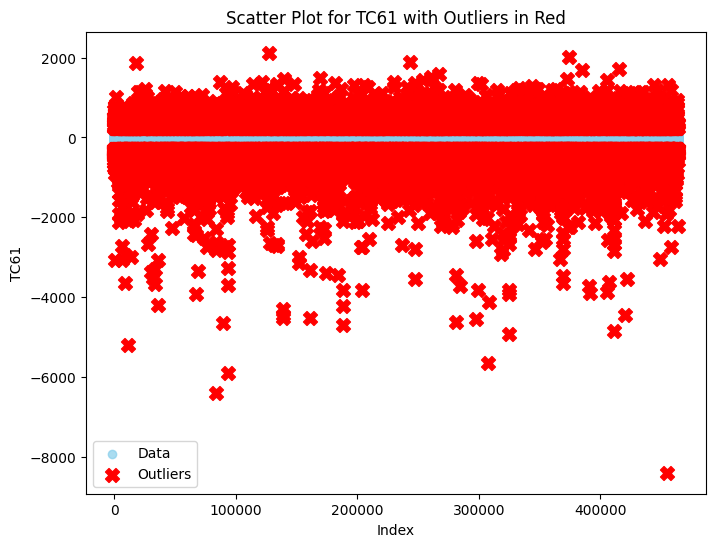

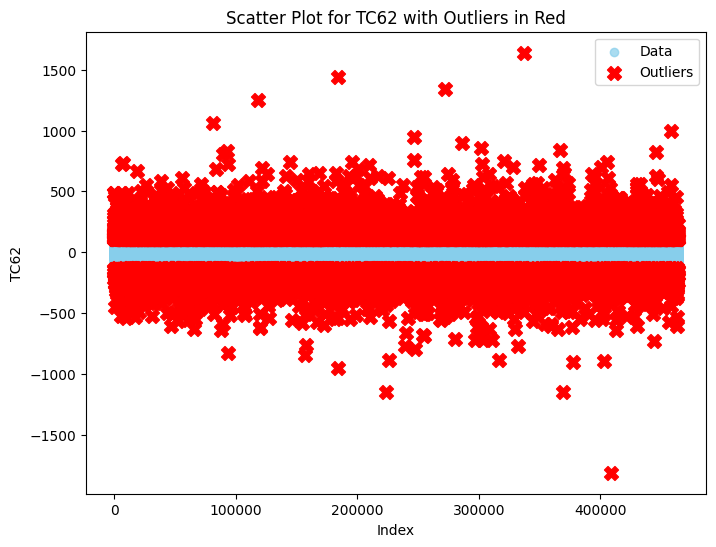

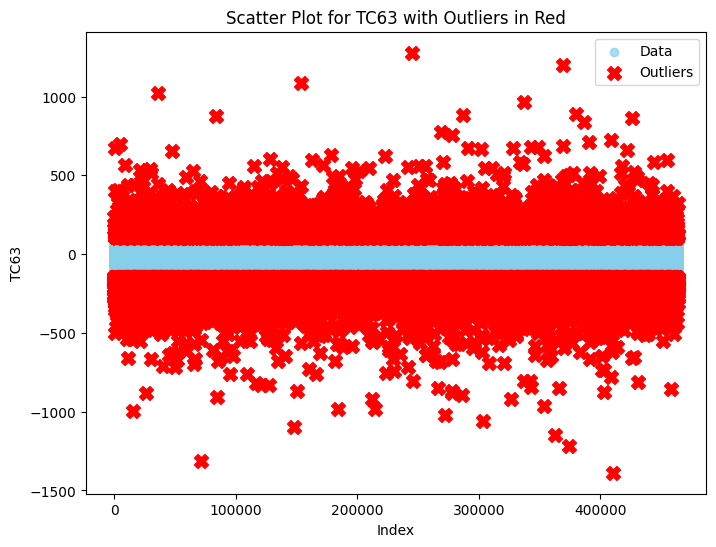

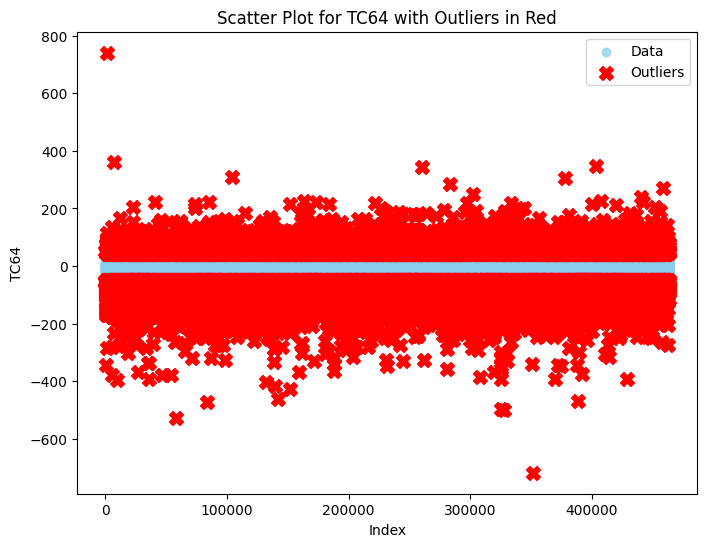

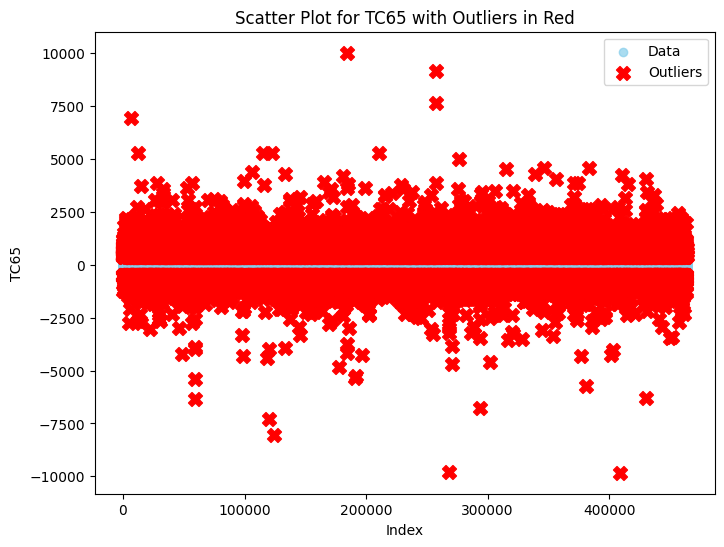

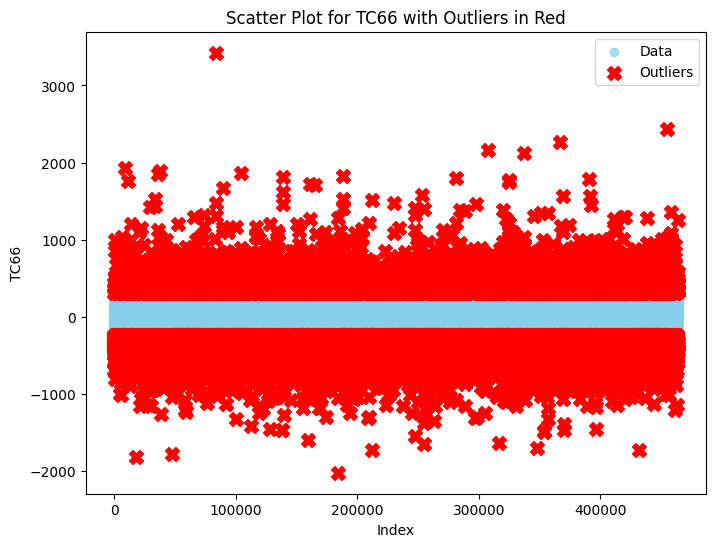

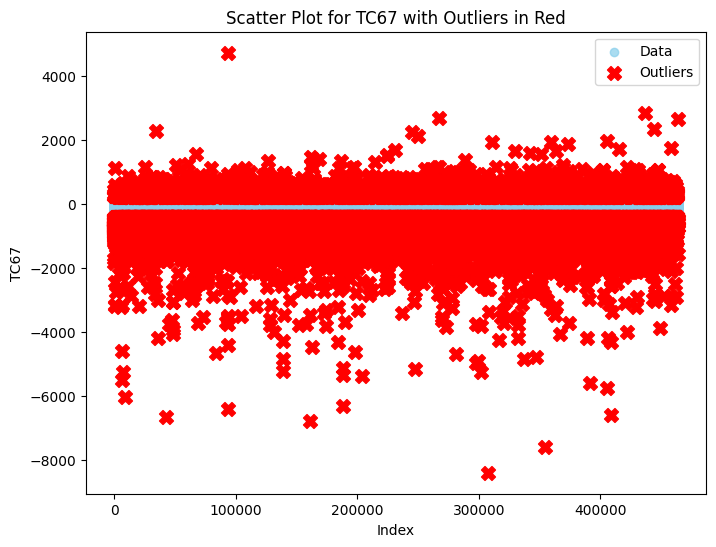

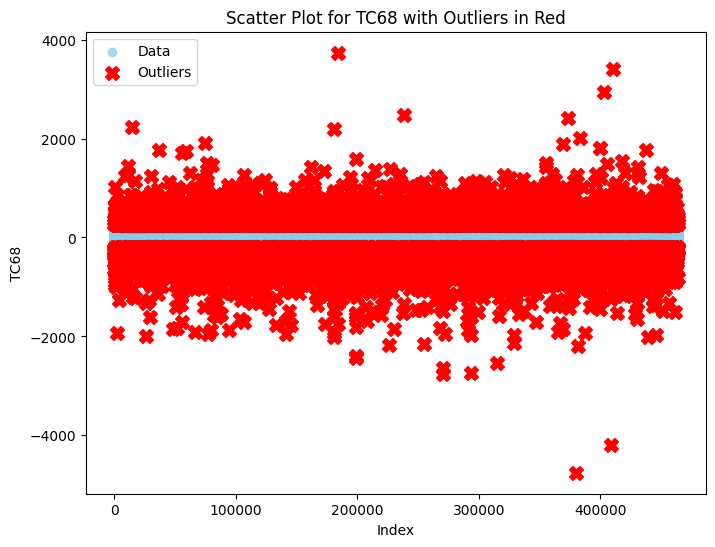

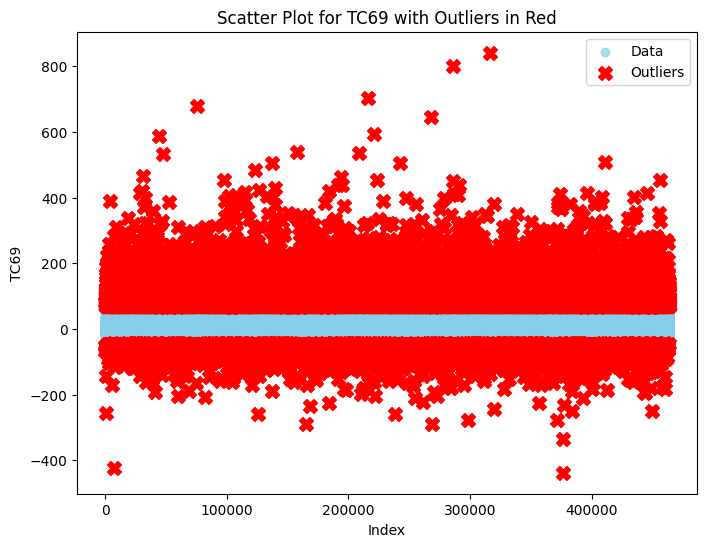

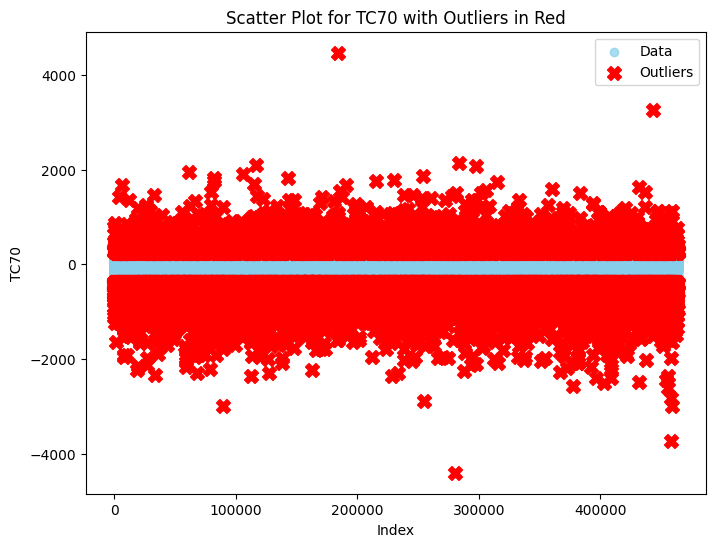

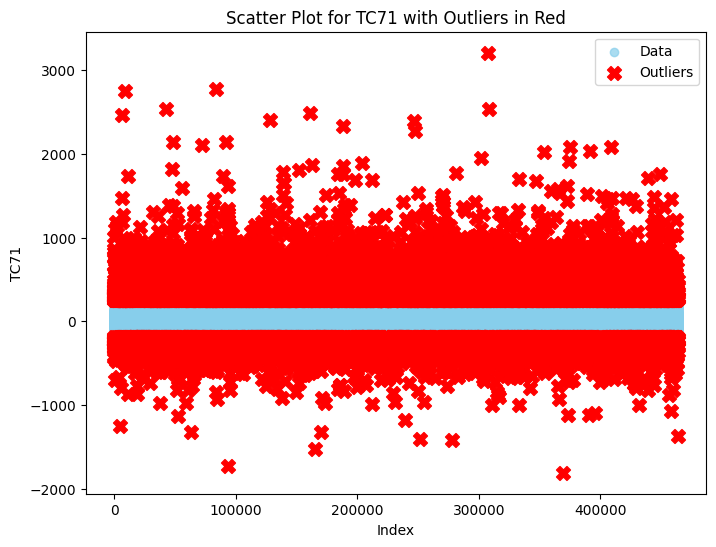

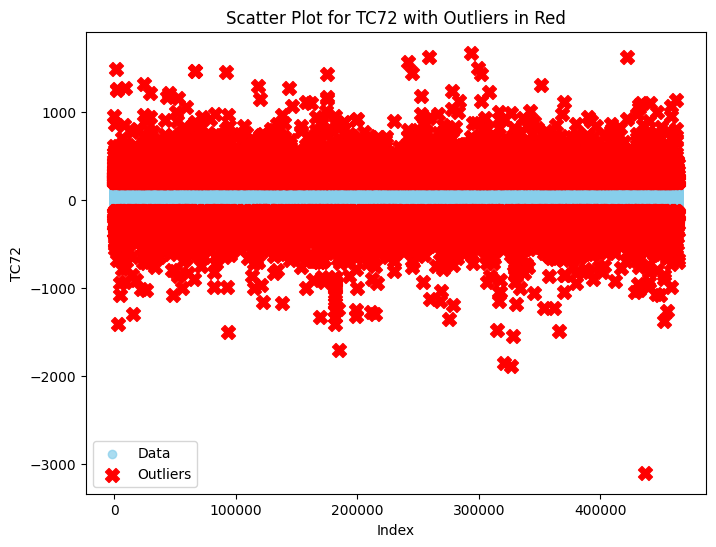

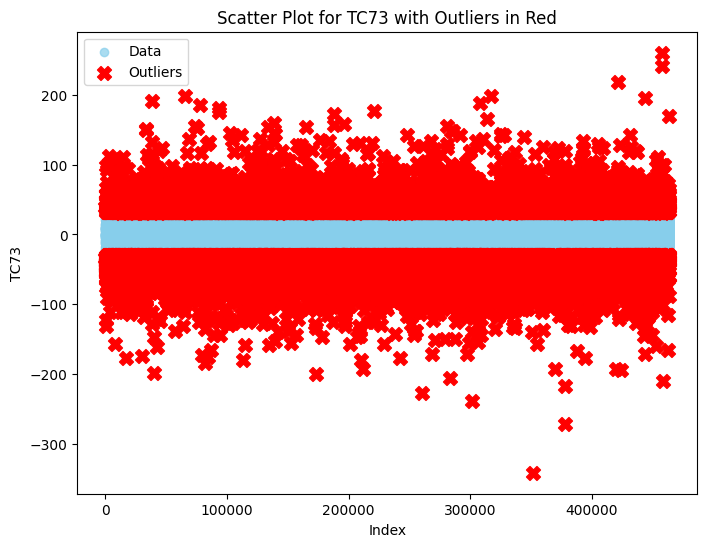

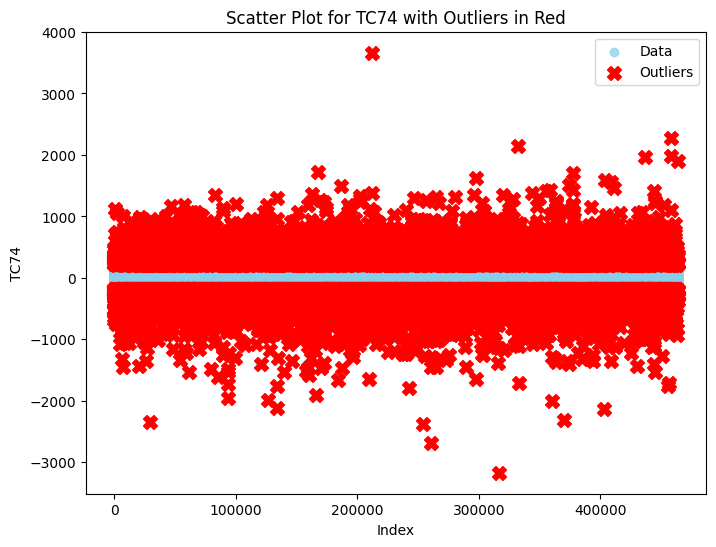

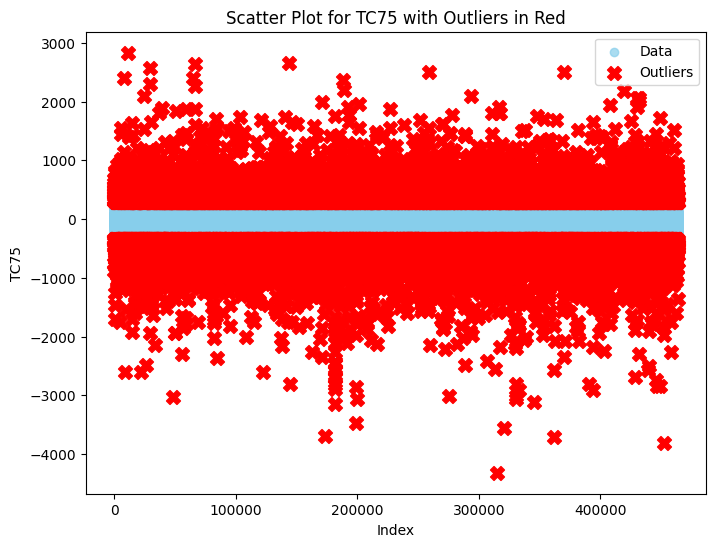

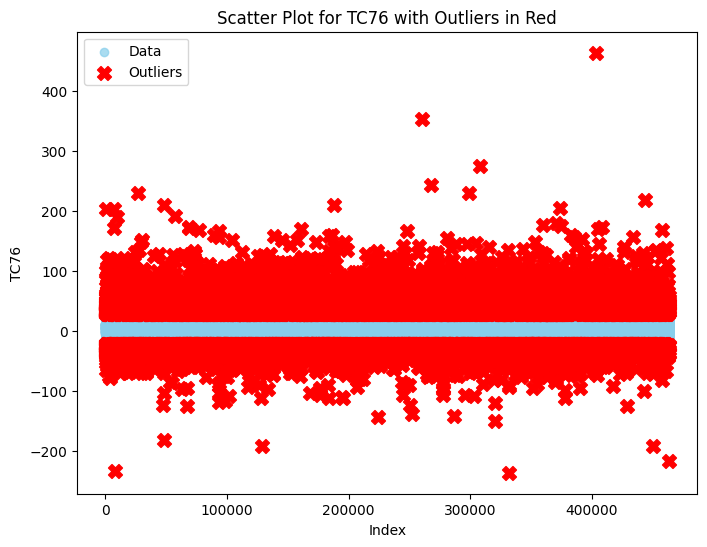

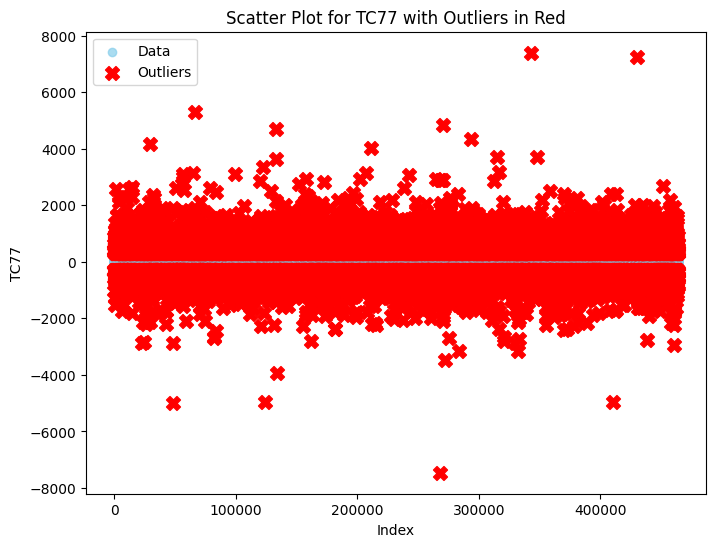

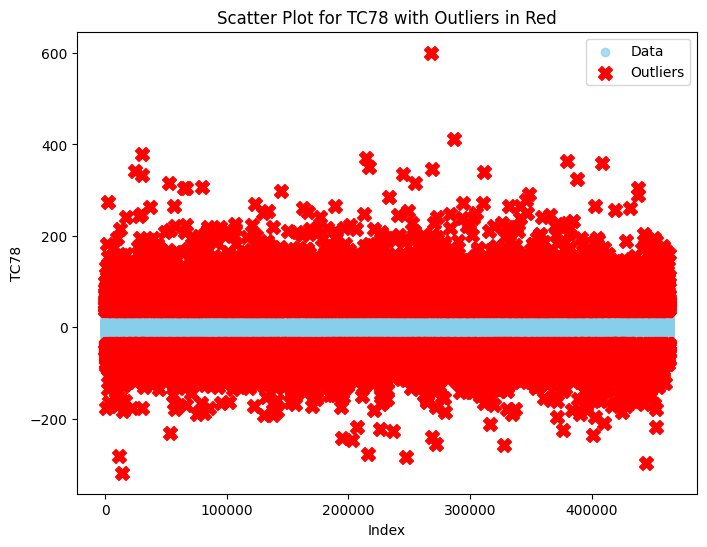

In [10]:
# Generate scatter plots only for the columns that contain outliers
for feature in outlier_columns:
    plt.figure(figsize=(8, 6))  # Create a figure for the scatter plot

    # Plot all data points (excluding outliers) for the feature
    non_outliers = data[~outlier_mask]  # Data without outliers
    plt.scatter(non_outliers.index, non_outliers[feature], color='skyblue', label="Data", alpha=0.7)

    # Plot the outliers in red
    outliers = outliers_dict[feature]  # Get the outliers for the current feature
    plt.scatter(outliers.index, outliers[feature], color='red', label="Outliers", s=100, marker='X')

    # Set title and labels for the plot
    plt.title(f"Scatter Plot for {feature} with Outliers in Red")
    plt.xlabel('Index')
    plt.ylabel(feature)
    plt.legend()
    # plt.show()
    plot_filename = f"song_scatter_{feature}.png"  # Use feature name in the file
    plt.savefig(os.path.join(output_path, plot_filename))

    # Print the outliers detected for the current feature
    print(f"\nOutliers Detected for {feature}:")
    print(outliers)

In [ ]:
# Visualize the original data with a pairplot (including outliers)
sns.pairplot(data, hue='Year', plot_kws={'alpha': 0.5})
plt.suptitle("Pairplot of Features with Year Class Labels (Including Outliers)", y=1.02)
# plt.show()
plt.savefig(os.path.join(output_path, "song_outliers_year.png"))

In [10]:
# Remove the outliers from the dataset

cleaned_data = data.copy()

    # Loop through outlier columns to remove outliers
for feature in outlier_columns:
  outliers = outliers_dict[feature]  # Get outliers for the current feature
  cleaned_data = cleaned_data[~cleaned_data.index.isin(outliers.index)]  # Remove rows with outliers

In [ ]:
# Visualize the cleaned data with a pairplot (after removing outliers)
sns.pairplot(cleaned_data, hue='Year', plot_kws={'alpha': 0.5})
plt.suptitle("Pairplot of Features with Year Class Labels (After Removing Outliers)", y=1.02)
# plt.show()
plt.savefig(os.path.join(output_path, "song_removed_outliers_year.png"))

In [11]:
# Step 8: Preprocess the data

# Encode the target variable
label_encoder = LabelEncoder()
data['Year'] = label_encoder.fit_transform(data['Year'])

In [12]:
# Step 9: Handle non-numeric columns in X

# Convert categorical features to numeric using one-hot encoding or label encoding
# Here we use LabelEncoder for each categorical column (excluding the target 'Loan_Status')
for column in data.select_dtypes(include=['object']).columns:
    if column != 'Year':  # Avoid encoding the target variable
        label_encoder = LabelEncoder()
        data[column] = label_encoder.fit_transform(data[column])

In [13]:
# Step 10: Define features (X) and target (y)

X = data.drop(columns=['Year'])  # Features
y = data['Year']  # Target variable

# Step 11: Split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Step 11: Feature scaling

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Step 12: Model selection and training

# Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Decision Tree
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Random Forest
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

In [ ]:
# Step 13: Model evaluation

models = {
    "Logistic Regression": logistic_model,
    "Decision Tree": tree_model,
    "Random Forest": rf_model
}

In [ ]:
# Step 14: Display metrics

# Initialize dictionaries for storing metrics
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
conf_matrices = {}
class_reports = {}

# Calculate metrics for each model
for model_name, model in models.items():
    pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred, average="weighted")
    recall = recall_score(y_test, pred, average="weighted")
    f1 = f1_score(y_test, pred, average="weighted")

    # Append metric scores
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

    # Store confusion matrices and classification reports if needed
    conf_matrices[model_name] = confusion_matrix(y_test, pred)
    class_reports[model_name] = classification_report(y_test, pred)

# Creating the DataFrame with the metrics
metrics_df = pd.DataFrame({
    "Model": list(models.keys()),
    "Accuracy": accuracy_scores,
    "Precision": precision_scores,
    "Recall": recall_scores,
    "F1 Score": f1_scores
})

# Melt the DataFrame for easier plotting with Seaborn
metrics_melted = metrics_df.melt(id_vars="Model", var_name="Metric", value_name="Score")

In [ ]:
# Plotting the metrics
plt.figure(figsize=(12, 8))
sns.barplot(data=metrics_melted, x="Model", y="Score", hue="Metric", palette="viridis")
plt.title("Model Metrics Comparison")
plt.xlabel("Model")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(title="Metric")
# plt.show()
plt.savefig(os.path.join(output_path, "song_metrics.png"))

In [ ]:
# Plot confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for i, (model_name, cm) in enumerate(conf_matrices.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", ax=axes[i], cbar=False)
    axes[i].set_title(f"Confusion Matrix: {model_name}")
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Ground Truth")

plt.tight_layout()
# plt.show()
plt.savefig(os.path.join(output_path, "song_metrix.png"))

In [ ]:
# Display classification reports
for model_name, report in class_reports.items():
    print(f"\nClassification Report for {model_name}:\n{report}")